In [1]:
import wrds
db = wrds.Connection(wrds_username = 'yangch69')

Loading library list...
Done


In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.api import OLS, add_constant

In [3]:
from dateutil.relativedelta import *
from pandas.tseries.offsets import *

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from scipy import stats
import datetime as dt


In [5]:
#########################
# Assign Fama-French 48 #
#########################

# function to assign ffi48 classification
def ffi48(row):
    if (100<=row['sic'] <=299) or (700<=row['sic']<=799) or (910<=row['sic']<=919) or (row['sic']==2048):
        ffi48=1
        ffi48_desc='Agric'
    elif (2000<=row['sic']<=2046) or (2050<=row['sic']<=2063) or (2070<=row['sic']<=2079)\
    or (2090<=row['sic']<=2092) or (row['sic']==2095) or (2098<=row['sic']<=2099):
        ffi48=2
        ffi48_desc='Food'
    elif (2064<=row['sic']<=2068) or (2086<=row['sic']<=2087) or (2096<=row['sic']<=2097):
        ffi48=3
        ffi48_desc='Soda'
    elif (row['sic']==2080) or (2082<=row['sic']<=2085):
        ffi48=4
        ffi48_desc='Beer'
    elif (2100<=row['sic']<=2199):
        ffi48=5
        ffi48_desc='Smoke'
    elif (920<=row['sic']<=999) or (3650<=row['sic']<=3652) or (row['sic']==3732) or (3930<=row['sic']<=3931) or (3940<=row['sic']<=3949):
        ffi48=6
        ffi48_desc='Toys'
    elif (7800<=row['sic']<=7833) or (7840<=row['sic']<=7841) or(row['sic']==7900)or (7910<=row['sic']<=7911) or (7920<=row['sic']<=7933)\
    or (7940<=row['sic']<=7949) or (row['sic']==7980) or (7990<=row['sic']<=7999):
        ffi48=7
        ffi48_desc='Fun'
    elif (2700<=row['sic']<=2749) or (2770<=row['sic']<=2771) or (2780<=row['sic']<=2799):
        ffi48=8
        ffi48_desc='Books'
    elif (row['sic']==2047) or (2391<=row['sic']<=2392) or (2510<=row['sic']<=2519) or (2590<=row['sic']<=2599) or (2840<=row['sic']<=2844)\
    or (3160<=row['sic']<=3161) or (3170<=row['sic']<=3172) or (3190<=row['sic']<=3199) or (row['sic']==3229) or (row['sic']==3260)\
    or (3262<=row['sic']<=3263) or (row['sic']==3269) or (3230<=row['sic']<=3231) or(3630<=row['sic']<=3639) or (3750<=row['sic']<=3751)\
    or (row['sic']==3800) or (3860<=row['sic']<=3861) or (3870<=row['sic']<=3873) or (3910<=row['sic']<=3911) or (3914<=row['sic']<=3915)\
    or (3960<=row['sic']<=3962) or (row['sic']==3991) or (row['sic']==3995):
        ffi48=9
        ffi48_desc='Hshld'
    elif (2300<=row['sic']<=2390) or (3020<=row['sic']<=3021) or (3100<=row['sic']<=3111)\
    or (3130<=row['sic']<=3131) or (3140<=row['sic']<=3151) or (3963<=row['sic']<=3965):
        ffi48=10
        ffi48_desc='Clths'
    elif (8000<=row['sic']<=8099):
        ffi48=11
        ffi48_desc='Hlth'
    elif (row['sic']==3693) or (3840<=row['sic']<=3851):
        ffi48=12
        ffi48_desc='MedEq'
    elif (2830<=row['sic']<=2831) or (2833<=row['sic']<=2836):
        ffi48=13
        ffi48_desc='Drugs'
    elif (2800<=row['sic']<=2829) or (2850<=row['sic']<=2879) or (2890<=row['sic']<=2899):
        ffi48=14
        ffi48_desc='Chems'
    elif (row['sic']==3031) or (row['sic']==3041) or (3050<=row['sic']<=3053) or (3060<=row['sic']<=3069) or (3070<=row['sic']<=3099):
        ffi48=15
        ffi48_desc='Rubbr'
    elif (2200<=row['sic']<=2284) or (2290<=row['sic']<=2295) or (2297<=row['sic']<=2299) or (2393<=row['sic']<=2395) or (2397<=row['sic']<=2399):
        ffi48=16
        ffi48_desc='Txtls'
    elif (800<=row['sic']<=899) or (2400<=row['sic']<=2439) or (2450<=row['sic']<=2459) or (2490<=row['sic']<=2499) or (2660<=row['sic']<=2661)\
    or (2950<=row['sic']<=2952) or (row['sic']==3200) or (3210<=row['sic']<=3211) or (3240<=row['sic']<=3241) or (3250<=row['sic']<=3259)\
    or (row['sic']==3261) or (row['sic']==3264) or (3270<=row['sic']<=3275) or (3280<=row['sic']<=3281) or (3290<=row['sic']<=3293)\
    or (3295<=row['sic']<=3299) or (3420<=row['sic']<=3433) or (3440<=row['sic']<=3442) or (row['sic']==3446) or (3448<=row['sic']<=3452)\
    or (3490<=row['sic']<=3499) or (row['sic']==3996):
        ffi48=17
        ffi48_desc='BldMt'
    elif (1500<=row['sic']<=1511) or (1520<=row['sic']<=1549) or (1600<=row['sic']<=1799):
        ffi48=18
        ffi48_desc='Cnstr'
    elif (row['sic']==3300) or (3310<=row['sic']<=3317) or (3320<=row['sic']<=3325) or (3330<=row['sic']<=3341) or(3350<=row['sic']<=3357)\
    or (3360<=row['sic']<=3379) or (3390<=row['sic']<=3399):
        ffi48=19
        ffi48_desc='Steel'
    elif (row['sic']==3400) or (3443<=row['sic']<=3444) or (3460<=row['sic']<=3479):
        ffi48=20
        ffi48_desc='FabPr'
    elif (3510<=row['sic']<=3536) or (row['sic']==3538) or (3540<=row['sic']<=3569)\
    or (3580<=row['sic']<=3582) or (3585<=row['sic']<=3586) or (3589<=row['sic']<=3599):
        ffi48=21
        ffi48_desc='Mach'
    elif (row['sic']==3600) or (3610<=row['sic']<=3613) or (3620<=row['sic']<=3621) or (3623<=row['sic']<=3629) or (3640<=row['sic']<=3646)\
    or (3648<=row['sic']<=3649) or (row['sic']==3660) or (3690<=row['sic']<=3692) or (row['sic']==3699):
            ffi48=22
            ffi48_desc='ElcEq'
    elif (row['sic']==2296) or (row['sic']==2396) or (3010<=row['sic']<=3011) or (row['sic']==3537) or (row['sic']==3647) or (row['sic']==3694)\
    or (row['sic']==3700) or (3710<=row['sic']<=3711) or (3713<=row['sic']<=3716) or (3790<=row['sic']<=3792) or (row['sic']==3799):
        ffi48=23
        ffi48_desc='Autos'
    elif (3720<=row['sic']<=3721) or (3723<=row['sic']<=3725) or (3728<=row['sic']<=3729):
        ffi48=24
        ffi48_desc='Aero'
    elif (3730<=row['sic']<=3731) or (3740<=row['sic']<=3743):
        ffi48=25
        ffi48_desc='Ships'
    elif (3760<=row['sic']<=3769) or (row['sic']==3795) or (3480<=row['sic']<=3489):
        ffi48=26
        ffi48_desc='Guns'
    elif (1040<=row['sic']<=1049):
        ffi48=27
        ffi48_desc='Gold'
    elif (1000<=row['sic']<=1039) or (1050<=row['sic']<=1119) or (1400<=row['sic']<=1499):
        ffi48=28
        ffi48_desc='Mines'
    elif (1200<=row['sic']<=1299):
        ffi48=29
        ffi48_desc='Coal'
    elif (row['sic']==1300) or (1310<=row['sic']<=1339) or (1370<=row['sic']<=1382) or (row['sic']==1389) or (2900<=row['sic']<=2912) or (2990<=row['sic']<=2999):
        ffi48=30
        ffi48_desc='Oil'
    elif (row['sic']==4900) or (4910<=row['sic']<=4911) or (4920<=row['sic']<=4925) or (4930<=row['sic']<=4932) or (4939<=row['sic']<=4942):
        ffi48=31
        ffi48_desc='Util'
    elif (row['sic']==4800) or (4810<=row['sic']<=4813) or (4820<=row['sic']<=4822) or (4830<=row['sic']<=4841) or (4880<=row['sic']<=4892) or (row['sic']==4899):
        ffi48=32
        ffi48_desc='Telcm'
    elif (7020<=row['sic']<=7021) or (7030<=row['sic']<=7033) or (row['sic']==7200) or (7210<=row['sic']<=7212) or (7214<=row['sic']<=7217)\
    or (7219<=row['sic']<=7221) or (7230<=row['sic']<=7231) or (7240<=row['sic']<=7241) or (7250<=row['sic']<=7251) or (7260<=row['sic']<=7299)\
    or (row['sic']==7395) or (row['sic']==7500) or (7520<=row['sic']<=7549) or (row['sic']==7600) or (row['sic']==7620)\
    or (7622<=row['sic']<=7623) or (7629<=row['sic']<=7631) or (7640<=row['sic']<=7641) or (7690<=row['sic']<=7699) or (8100<=row['sic']<=8499)\
    or (8600<=row['sic']<=8699) or (8800<=row['sic']<=8899) or (7510<=row['sic']<=7515):
        ffi48=33
        ffi48_desc='PerSv'
    elif (2750<=row['sic']<=2759) or (row['sic']==3993) or (row['sic']==7218) or (row['sic']==7300) or (7310<=row['sic']<=7342)\
    or (7349<=row['sic']<=7353) or (7359<=row['sic']<=7372) or (7374<=row['sic']<=7385) or (7389<=row['sic']<=7394) or (7396<=row['sic']<=7397)\
    or (row['sic']==7399) or (row['sic']==7519) or (row['sic']==8700) or (8710<=row['sic']<=8713) or (8720<=row['sic']<=8721) \
    or (8730<=row['sic']<=8734) or (8740<=row['sic']<=8748) or (8900<=row['sic']<=8911) or (8920<=row['sic']<=8999) or (4220<=row['sic']<=4229):
        ffi48=34
        ffi48_desc='BusSv'
    elif (3570<=row['sic']<=3579) or (3680<=row['sic']<=3689) or (row['sic']==3695) or (row['sic']==7373):
        ffi48=35
        ffi48_desc='Comps'
    elif (row['sic']==3622) or (3661<=row['sic']<=3666) or (3669<=row['sic']<=3679) or (row['sic']==3810) or (row['sic']==3812):
        ffi48=36
        ffi48_desc='Chips'
    elif (row['sic']==3811) or (3820<=row['sic']<=3827) or (3829<=row['sic']<=3839):
        ffi48=37
        ffi48_desc='LabEq'
    elif (2520<=row['sic']<=2549) or (2600<=row['sic']<=2639) or (2670<=row['sic']<=2699) or (2760<=row['sic']<=2761) or (3950<=row['sic']<=3955):
        ffi48=38
        ffi48_desc='Paper'
    elif (2440<=row['sic']<=2449) or (2640<=row['sic']<=2659) or (3220<=row['sic']<=3221) or (3410<=row['sic']<=3412):
        ffi48=39
        ffi48_desc='Boxes'
    elif (4000<=row['sic']<=4013) or (4040<=row['sic']<=4049) or (row['sic']==4100)  or (4110<=row['sic']<=4121) or (4130<=row['sic']<=4131)\
    or (4140<=row['sic']<=4142) or (4150<=row['sic']<=4151) or (4170<=row['sic']<=4173) or (4190<=row['sic']<=4200)\
    or (4210<=row['sic']<=4219) or (4230<=row['sic']<=4231) or (4240<=row['sic']<=4249) or (4400<=row['sic']<=4700) or (4710<=row['sic']<=4712)\
    or (4720<=row['sic']<=4749) or (row['sic']==4780) or (4782<=row['sic']<=4785) or (row['sic']==4789):
        ffi48=40
        ffi48_desc='Trans'
    elif (row['sic']==5000) or (5010<=row['sic']<=5015) or (5020<=row['sic']<=5023) or (5030<=row['sic']<=5060) or (5063<=row['sic']<=5065)\
    or (5070<=row['sic']<=5078) or (5080<=row['sic']<=5088) or (5090<=row['sic']<=5094) or (5099<=row['sic']<=5100)\
    or (5110<=row['sic']<=5113) or (5120<=row['sic']<=5122) or (5130<=row['sic']<=5172) or (5180<=row['sic']<=5182) or (5190<=row['sic']<=5199):
        ffi48=41
        ffi48_desc='Whlsl'
    elif (row['sic']==5200) or (5210<=row['sic']<=5231) or (5250<=row['sic']<=5251) or (5260<=row['sic']<=5261) or (5270<=row['sic']<=5271)\
    or (row['sic']==5300) or (5310<=row['sic']<=5311) or (row['sic']==5320) or (5330<=row['sic']<=5331) or (row['sic']==5334)\
    or (5340<=row['sic']<=5349) or (5390<=row['sic']<=5400) or (5410<=row['sic']<=5412) or (5420<=row['sic']<=5469) or (5490<=row['sic']<=5500)\
    or (5510<=row['sic']<=5579) or (5590<=row['sic']<=5700) or (5710<=row['sic']<=5722) or (5730<=row['sic']<=5736) or (5750<=row['sic']<=5799)\
    or (row['sic']==5900) or (5910<=row['sic']<=5912) or (5920<=row['sic']<=5932) or (5940<=row['sic']<=5990) or (5992<=row['sic']<=5995) or (row['sic']==5999):
        ffi48=42
        ffi48_desc='Rtail'
    elif (5800<=row['sic']<=5829) or (5890<=row['sic']<=5899) or (row['sic']==7000) or (7010<=row['sic']<=7019) or (7040<=row['sic']<=7049) or (row['sic']==7213):
        ffi48=43
        ffi48_desc='Meals'
    elif (row['sic']==6000) or (6010<=row['sic']<=6036) or (6040<=row['sic']<=6062) or (6080<=row['sic']<=6082) or (6090<=row['sic']<=6100)\
    or (6110<=row['sic']<=6113) or (6120<=row['sic']<=6179) or (6190<=row['sic']<=6199):
        ffi48=44
        ffi48_desc='Banks'
    elif (row['sic']==6300) or (6310<=row['sic']<=6331) or (6350<=row['sic']<=6351) or (6360<=row['sic']<=6361) or (6370<=row['sic']<=6379) or (6390<=row['sic']<=6411):
        ffi48=45
        ffi48_desc='Insur'
    elif (row['sic']==6500) or (row['sic']==6510) or (6512<=row['sic']<=6515) or (6517<=row['sic']<=6532) or (6540<=row['sic']<=6541)\
    or (6550<=row['sic']<=6553) or (6590<=row['sic']<=6599) or (6610<=row['sic']<=6611):
        ffi48=46
        ffi48_desc='RlEst'
    elif (6200<=row['sic']<=6299) or (row['sic']==6700) or (6710<=row['sic']<=6726) or (6730<=row['sic']<=6733) or (6740<=row['sic']<=6779)\
    or (6790<=row['sic']<=6795) or (6798<=row['sic']<=6799):
        ffi48=47
        ffi48_desc='Fin'
    elif (4950<=row['sic']<=4961) or (4970<=row['sic']<=4971) or (4990<=row['sic']<=4991) or (row['sic']==9999):
        ffi48=48
        ffi48_desc='Other'
    else:
        ffi48=np.nan
        ffi48_desc=''
    return pd.Series({'sic': row['sic'], 'ffi48': ffi48, 'ffi48_desc': ffi48_desc})

In [6]:
def log_return(x):
    return np.diff(np.log(x))

In [7]:
comp = db.raw_sql("""select gvkey, datadate, atq, txditcq, oancfy
                    pstkrq, seqq, pstkq
                    from comp.fundq
                    where indfmt='INDL' 
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and datadate between '01/01/1989' and '12/31/2022'
                    """, date_cols=['datadate'])
# create preferrerd stock
comp['year']=comp['datadate'].dt.year
comp['ps']=np.where(comp['pstkrq'].isnull(),comp['pstkq'], comp['pstkrq'])
comp['ps']=np.where(comp['ps'].isnull(),0,comp['ps'])
comp['txditcq']=comp['txditcq'].fillna(0)
comp.shape

(1528302, 9)

In [8]:
compa = db.raw_sql("""select gvkey, datadate,sich
                    from comp.funda
                    where indfmt='INDL' 
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and datadate between '01/01/1989' and '12/31/2022'
                    """, date_cols=['datadate'])
compa['year'] = compa['datadate'].dt.year
compa = compa.groupby(['year','gvkey'])['sich'].max().reset_index()
compa = compa.drop_duplicates()
comp = pd.merge(comp,compa[['gvkey','year','sich']],how='left', on=['gvkey','year'] )
comp.shape

(1528302, 10)

In [10]:
ibes = db.raw_sql("""select ticker, permno, sdate, edate,score
                    from wrdsapps_link_crsp_ibes.ibcrsphist
                    WHERE score < 6
                    """, date_cols=['sdaate,edate'])


ibes_rt = db.raw_sql("""select *
                    from ibes.recdsum where usfirm = 1
                    """, date_cols=['statpers'])

ibes['edate']=ibes['edate'].fillna(pd.to_datetime('today'))


In [12]:
ibes_rt = pd.merge(ibes_rt, ibes[['ticker', 'permno', 'sdate', 'edate']], how = 'inner',  on = 'ticker')

In [13]:
ibes_rt2 = ibes_rt[(ibes_rt['statpers']>=ibes_rt['sdate'])&(ibes_rt['statpers']<=ibes_rt['edate'])]

ibes_rt2 = ibes_rt2.astype({'permno':'int'})

In [14]:
ibes_rt2['jdate'] = ibes_rt2['statpers'] +MonthEnd(2)
ibes_rt2['net_buy'] = (ibes_rt2['buypct'] - ibes_rt2['sellpct'])/100

In [15]:
ibes_rt3 = ibes_rt2[['jdate','permno','net_buy']]

In [16]:
# create book equity

comp['be']=comp['seqq']+comp['txditcq']-comp['ps']
comp['be']=np.where(comp['be']>0, comp['be'], np.nan)

# number of years in Compustat
comp=comp.sort_values(by=['gvkey','datadate'])
comp['count']=comp.groupby(['gvkey']).cumcount()

comp=comp[['gvkey','datadate','year','be','count','sich']]

In [17]:
# Determine the 30/70 for bm_adj 
# Profitbility: roa
# Financial Soundness: ocf_lct
# Liquidity: curr_ratio
# Efficiency: at_turn
# ['roa','ocf_lct','curr_ratio','at_turn']

In [18]:
# Define financial ratio
finrat = db.raw_sql("""select gvkey, adate, qdate, public_date,bm,
                   roa, ocf_lct, curr_ratio, at_turn
                    from wrdsapps_finratio_ccm.firm_ratio_ccm
                    where public_date between '01/01/1989' and '12/31/2022'
                    """, date_cols=['public_date'])

In [19]:
comp1=pd.merge(comp,finrat,how='left',left_on=['gvkey','datadate'],right_on = ['gvkey','public_date'])


In [20]:
ratio_list = ['gvkey','datadate','be', 'count','adate', 'qdate', 'public_date','bm',
                      'roa', 'ocf_lct','curr_ratio','at_turn','sich']

In [21]:
###################
# CRSP Block      #
###################
# sql similar to crspmerge macro
crsp_m = db.raw_sql("""
                      select a.permno, a.permco, a.mthcaldt, 
                      a.issuertype, a.securitytype, a.securitysubtype, a.sharetype, a.usincflg, a.siccd,
                      a.primaryexch, a.conditionaltype, a.tradingstatusflg,
                      a.mthret, a.mthretx, a.shrout, a.mthprc, a.mthvol
                      from crsp.msf_v2 as a
                      where a.mthcaldt between '01/01/1989' and '12/31/2022'
                      """, date_cols=['mthcaldt']) 



In [22]:
# Select common stock universe, traded on NYSE, AMEX and NASDAQ
crsp_m = crsp_m.loc[(crsp_m.sharetype=='NS') & \
                    (crsp_m.securitytype=='EQTY') & \
                    (crsp_m.securitysubtype=='COM') & \
                    (crsp_m.usincflg=='Y') & \
                    (crsp_m.issuertype.isin(['ACOR', 'CORP']))]

crsp_m = crsp_m.loc[(crsp_m.primaryexch.isin(['N', 'A', 'Q'])) & \
                   (crsp_m.conditionaltype =='RW') & \
                   (crsp_m.tradingstatusflg =='A')]
crsp_m.shape

(2070308, 17)

In [23]:
# change variable format to int
crsp_m[['permco','permno']]=crsp_m[['permco','permno']].astype(int)

# Line up date to be end of month
crsp_m['jdate']=crsp_m['mthcaldt']+MonthEnd(0)

In [24]:
# calculate market equity
crsp = crsp_m.copy()

crsp['mthret']=crsp['mthret'].fillna(0)
crsp['mthretx']=crsp['mthretx'].fillna(0)
crsp['me']=crsp['mthprc']*crsp['shrout'] 
crsp=crsp.drop(['mthprc'], axis=1)
crsp=crsp.sort_values(by=['jdate','permco','me'])

In [25]:
### Aggregate Market Cap ###
# sum of me across different permno belonging to same permco a given date
crsp_summe = crsp.groupby(['jdate','permco'])['me'].sum().reset_index()

# largest mktcap within a permco/date
crsp_maxme = crsp.groupby(['jdate','permco'])['me'].max().reset_index()

# join by jdate/maxme to find the permno
crsp1=pd.merge(crsp, crsp_maxme, how='inner', on=['jdate','permco','me'])

# drop me column and replace with the sum me
crsp1=crsp1.drop(['me'], axis=1)

# join with sum of me to get the correct market cap info
crsp2=pd.merge(crsp1, crsp_summe, how='inner', on=['jdate','permco'])

# sort by permno and date and also drop duplicates
crsp2=crsp2.sort_values(by=['permno','jdate']).drop_duplicates()


In [26]:
# keep December market cap
crsp2['year']=crsp2['jdate'].dt.year
crsp2['month']=crsp2['jdate'].dt.month
crsp2['quarter']=crsp2['jdate'] + QuarterEnd(0)


crsp2['1+retx']=1+crsp2['mthretx']
crsp2=crsp2.sort_values(by=['permno','mthcaldt'])

In [27]:

# cumret by stock
crsp2['cumretx']=crsp2.groupby(['permno','quarter'])['1+retx'].cumprod()
crsp2['cumvol']=crsp2.groupby(['permno','quarter'])['mthvol'].cumsum()



# lag cumret
crsp2['lcumretx']=crsp2.groupby(['permno'])['cumretx'].shift(1)


# lag market cap
crsp2['lme']=crsp2.groupby(['permno'])['me'].shift(1)
crsp2['lcumvol']=crsp2.groupby(['permno'])['cumvol'].shift(1)

# if first permno then use me/(1+retx) to replace the missing value
crsp2['count']=crsp2.groupby(['permno']).cumcount()
crsp2['lme']=np.where(crsp2['count']==0, crsp2['me']/crsp2['1+retx'], crsp2['lme'])


In [28]:
crsp2.head()

,permno,permco,mthcaldt,issuertype,securitytype,securitysubtype,sharetype,usincflg,siccd,primaryexch,...,year,month,quarter,1+retx,cumretx,cumvol,lcumretx,lme,lcumvol,count
2969,10001,7953,1989-01-31,CORP,EQTY,COM,NS,Y,4925.0,Q,...,1989,1,1989-03-31,1.019608,1.019608,25159.0,NaN,6362.25,NaN,0
8951,10001,7953,1989-02-28,CORP,EQTY,COM,NS,Y,4925.0,Q,...,1989,2,1989-03-31,1.038462,1.058824,66861.0,1.019608,6487.00,25159.0,1
14902,10001,7953,1989-03-31,CORP,EQTY,COM,NS,Y,4925.0,Q,...,1989,3,1989-03-31,1.000000,1.058824,90931.0,1.058824,6736.50,66861.0,2
20835,10001,7953,1989-04-28,CORP,EQTY,COM,NS,Y,4925.0,Q,...,1989,4,1989-06-30,1.074074,1.074074,31040.0,1.058824,6736.50,90931.0,3
26753,10001,7953,1989-05-31,CORP,EQTY,COM,NS,Y,4925.0,Q,...,1989,5,1989-06-30,0.965517,1.037037,93930.0,1.074074,7235.50,31040.0,4


In [29]:
_tmp_crsp = crsp2[['permno','mthcaldt','mthret']].sort_values(['permno','mthcaldt']).set_index('mthcaldt')

_tmp_crsp['logret']=np.log(1+_tmp_crsp['mthret'])

_tmp_cumret = _tmp_crsp.groupby(['permno'])['logret'].rolling(12, min_periods=7).sum()
_tmp_cumret = _tmp_cumret.reset_index()
_tmp_cumret['cumret']=np.exp(_tmp_cumret['logret'])-1

_temp_crsp2 = pd.merge(_tmp_crsp.reset_index(), _tmp_cumret[['permno','mthcaldt','cumret']], how='left', on=['permno','mthcaldt'])
_temp_crsp2['mom']=_temp_crsp2.groupby('permno')['cumret'].shift(1)
_temp_crsp2=_temp_crsp2.drop(['logret','cumret'], axis=1)


crsp2 = pd.merge(crsp2, _temp_crsp2[['mom','permno','mthcaldt']], how='left', on=['permno','mthcaldt'])


C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
crsp2.columns

Index(['permno', 'permco', 'mthcaldt', 'issuertype', 'securitytype',
       'securitysubtype', 'sharetype', 'usincflg', 'siccd', 'primaryexch',
       'conditionaltype', 'tradingstatusflg', 'mthret', 'mthretx', 'shrout',
       'mthvol', 'jdate', 'me', 'year', 'month', 'quarter', '1+retx',
       'cumretx', 'cumvol', 'lcumretx', 'lme', 'lcumvol', 'count', 'mom'],
      dtype='object')

In [31]:
# baseline me and merge result back to get weight
mebase=crsp2[crsp2['month'].isin([4,7,10,1])][['permno','quarter', 'lme']].rename(columns={'lme':'mebase'})
crsp3=pd.merge(crsp2, mebase, how='left', on=['permno','quarter'])
crsp3['wt']=np.where(crsp3['month'].isin([4,7,10,1]),crsp3['lme'], crsp3['mebase']*crsp3['lcumretx'])


In [32]:
pevme=crsp2[crsp2['month'].isin([4,7,10,1])]
pevme=pevme[['permno','mthcaldt','month','me','year']].rename(columns={'me':'pev_me'})
pevme['year']=pevme['year']+1
pevme['month']=pevme['month']-1
pevme['month'] = np.where(pevme['month'] == 0, 12, pevme['month'])
pevme=pevme[['permno','year','month','pev_me']]

In [33]:
crsp3_qe = crsp3[crsp3['month'].isin([3,6,9,12])]
crsp_qe = pd.merge(crsp3_qe, pevme, how='inner', on=['permno','year','month'])
crsp_qe=crsp_qe[['permno','mthcaldt', 'jdate', 'sharetype', 'securitytype', 'securitysubtype', 'usincflg', 'issuertype','siccd', \
                   'primaryexch', 'conditionaltype', 'tradingstatusflg', \
                   'mthret','me','wt','cumretx','mebase','lme','pev_me','mom','lcumvol','shrout']]
crsp_qe=crsp_qe.sort_values(by=['permno','jdate']).drop_duplicates()

In [34]:
#######################
# CCM Block           #
#######################
ccm=db.raw_sql("""
                  select gvkey, lpermno as permno, linktype, linkprim, 
                  linkdt, linkenddt
                  from crsp.ccmxpf_linktable
                  where substr(linktype,1,1)='L'
                  and (linkprim ='C' or linkprim='P')
                  """, date_cols=['linkdt', 'linkenddt'])

# if linkenddt is missing then set to today date
ccm['linkenddt']=ccm['linkenddt'].fillna(pd.to_datetime('today'))

ccm1=pd.merge(comp1[ratio_list],ccm,how='left',on=['gvkey'])

ccm1.sort_values(by=['gvkey','datadate'])

'''
ccm1['yearend']=ccm1['datadate']+YearEnd(0)
ccm1['jdate']=ccm1['yearend']+MonthEnd(6)'''

ccm1['bedate'] = ccm1['datadate'] + QuarterEnd(2)

ccm1['jdate'] = ccm1['datadate'] + QuarterEnd(0)
ccm_be = ccm1[['gvkey','be','bedate']].rename(columns={'bedate':'jdate','be':'lbe'}).drop_duplicates()

ccm1=pd.merge(ccm1,ccm_be,how='left',on=['gvkey','jdate'])
ccm1 = ccm1.rename(columns = {'bedate':'qtrdate'})



In [35]:
# set link date bounds
ccm2=ccm1[(ccm1['jdate']>=ccm1['linkdt'])&(ccm1['jdate']<=ccm1['linkenddt'])]
ccm2 = ccm2.astype({'permno':'int'})
ccm2=ccm2[['gvkey','permno', 'jdate','lbe','gvkey','be', 'bm','count','adate', 'qdate', 'public_date','roa','ocf_lct','curr_ratio','at_turn','qtrdate','sich','datadate']]
# link comp and crsp
ccm_qe=pd.merge(crsp_qe, ccm2, how='inner', on=['permno', 'jdate'])
ccm_qe['beme']=ccm_qe['lbe']*1000/ccm_qe['mebase']


ccm_qe['beme']=np.where(np.isfinite(ccm_qe['beme']), ccm_qe['beme'], ccm_qe['bm'])


In [36]:
ccm_qe[['beme','bm','roa','ocf_lct','curr_ratio','at_turn','sich']].describe()

,beme,bm,roa,ocf_lct,curr_ratio,at_turn,sich
count,563355.000000,556548.000000,568577.000000,469198.000000,471163.000000,5.595050e+05,530161.000000
mean,0.780144,0.738402,0.039190,0.052704,3.392931,9.718854e-01,4706.837019
std,1.243569,0.896902,0.277160,5.443910,43.340581,9.055000e-01,1917.714356
min,0.000001,0.000002,-40.237814,-1921.200000,-0.004986,6.342682e-18,100.000000
25%,0.289360,0.310498,0.016345,-0.049875,1.321645,3.129866e-01,3357.000000
50%,0.539262,0.562206,0.084171,0.307445,2.038178,8.066250e-01,4213.000000
75%,0.911728,0.909185,0.155987,0.682774,3.357723,1.364314e+00,6036.000000
max,170.933333,170.933333,9.624253,1800.307692,13400.034483,4.374189e+01,9997.000000


ccm_qe

In [37]:
ccm_qe

,permno,mthcaldt,jdate,sharetype,securitytype,securitysubtype,usincflg,issuertype,siccd,primaryexch,...,qdate,public_date,roa,ocf_lct,curr_ratio,at_turn,qtrdate,sich,datadate,beme
0,10001,1990-03-30,1990-03-31,NS,EQTY,COM,Y,CORP,4925.0,Q,...,1989-12-31,1990-03-31,0.180327,0.508677,1.243238,1.301493,1990-09-30,4924.0,1990-03-31,0.801720
1,10001,1990-06-29,1990-06-30,NS,EQTY,COM,Y,CORP,4925.0,Q,...,1990-03-31,1990-06-30,0.181323,0.693056,1.278309,1.223747,1990-12-31,4924.0,1990-06-30,0.866626
2,10001,1990-09-28,1990-09-30,NS,EQTY,COM,Y,CORP,4925.0,Q,...,1990-06-30,1990-09-30,0.177322,0.836572,1.571113,1.240560,1991-03-31,4924.0,1990-09-30,0.942376
3,10001,1990-12-31,1990-12-31,NS,EQTY,COM,Y,CORP,4925.0,Q,...,1990-09-30,1990-12-31,0.161960,0.672101,1.340247,1.166318,1991-06-30,4924.0,1990-12-31,0.927203
4,10001,1991-03-28,1991-03-31,NS,EQTY,COM,Y,CORP,4925.0,Q,...,1990-12-31,1991-03-31,0.170997,0.614188,1.348320,1.192696,1991-09-30,4924.0,1991-03-31,0.915610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583462,93436,2021-12-31,2021-12-31,NS,EQTY,COM,Y,CORP,9999.0,Q,...,2021-09-30,2021-12-31,0.138650,0.625112,1.591216,0.859202,2022-06-30,3711.0,2021-12-31,0.027103
583463,93436,2022-03-31,2022-03-31,NS,EQTY,COM,Y,CORP,9999.0,Q,...,2021-12-31,2022-03-31,0.164632,0.583456,1.375285,0.941958,2022-09-30,3711.0,2022-03-31,0.018478
583464,93436,2022-06-30,2022-06-30,NS,EQTY,COM,Y,CORP,9999.0,Q,...,2022-03-31,2022-06-30,0.224059,0.733032,1.400400,1.031561,2022-12-31,3711.0,2022-06-30,0.016765
583465,93436,2022-09-30,2022-09-30,NS,EQTY,COM,Y,CORP,9999.0,Q,...,2022-06-30,2022-09-30,0.236999,0.694935,1.386785,1.055588,2023-03-31,3711.0,2022-09-30,0.042957


In [38]:
# assign SIC code
comp3 = ccm_qe
comp4 = comp3

# First use historical Compustat SIC Code
# Then if missing use historical CRSP SIC Code
comp4['sic']=np.where(comp4['sich']>0, comp4['sich'], comp4['siccd'])

# and adjust some SIC code to fit F&F 48 ind delineation
comp4['sic']=np.where((comp4['sic'].isin([3990, 9995, 9997])) & (comp4['siccd']>0) & (comp4['sic'] != comp4['siccd']), \
             comp4['siccd'], comp4['sic'])
comp4['sic']=np.where(comp4['sic'].isin([3990,3999]), 3991, comp4['sic'])
comp4['sic']=comp4.sic.astype(int)

# assign the ffi48 function to comp4
_sic = comp4['sic'].unique()
_sicff = pd.DataFrame(_sic).rename(columns={0:'sic'})
_sicff = _sicff.apply(ffi48, axis=1)
comp4 = pd.merge(comp4, _sicff, how='left', on=['sic'])

# keep only records with non-missing bm and ffi48 classification
comp4 = comp4[(comp4['beme'] != np.NaN) & (comp4['ffi48_desc'] !='')] 
comp4 = comp4.drop(['sich','siccd','datadate'], axis=1)
comp4 =comp4.sort_values(['ffi48','jdate'])

In [39]:
comp4.groupby(['ffi48','ffi48_desc','jdate'])['permno'].count()

ffi48  ffi48_desc  jdate     
1.0    Agric       1990-03-31     17
                   1990-06-30     16
                   1990-09-30     17
                   1990-12-31     15
                   1991-03-31     19
                                ... 
48.0   Other       2021-12-31     25
                   2022-03-31    752
                   2022-06-30    822
                   2022-09-30    873
                   2022-12-31    273
Name: permno, Length: 6336, dtype: int64

In [40]:
#########################
# Industry BM Average   #
#########################

# Calculate BM Industry Average Each Period
comp4_tmp = comp4[(comp4['ffi48']>0)&(comp4['beme']>=0)]
bm_ind = comp4_tmp.groupby(['ffi48','jdate'])['beme'].mean().reset_index().rename(columns={'beme':'bmind'})
bm_ind

# Calculate Long-Term Industry BtM Average
bm_ind['bmavg']=bm_ind.groupby('ffi48')['bmind'].rolling(4, min_periods = 1).mean().reset_index(0,drop=True)


# Adjust Firm-Specific BtM with Industry Averages
comp5 = pd.merge(comp4, bm_ind, how='left',on=['ffi48','jdate'])
comp5['bm_adj'] = comp5['beme']-comp5['bmavg']


In [41]:
#########################
# Industry BM Average   #
#########################
# Determine the 30/70 for bm_adj 
# Profitbility: roa
# Financial Soundness: ocf_lct
# Liquidity: curr_ratio
# Efficiency: at_turn
# ['roa','ocf_lct','curr_ratio','at_turn']
# Calculate Other Average Each Period

comp5_tmp = comp5[(comp5['ffi48']>0)]
comp5_tmp = comp5_tmp[['ffi48','jdate','roa','ocf_lct','curr_ratio','at_turn','mom']].dropna()
roa_ind = comp5_tmp.groupby(['ffi48','jdate'])['roa'].mean().reset_index().rename(columns={'roa':'roaind'})
ocf_ind = comp5_tmp.groupby(['ffi48','jdate'])['ocf_lct'].mean().reset_index().rename(columns={'ocf_lct':'ocfind'})
curr_ind = comp5_tmp.groupby(['ffi48','jdate'])['curr_ratio'].mean().reset_index().rename(columns={'curr_ratio':'currind'})
at_ind = comp5_tmp.groupby(['ffi48','jdate'])['at_turn'].mean().reset_index().rename(columns={'at_turn':'atind'})
mom_ind = comp5_tmp.groupby(['ffi48','jdate'])['mom'].mean().reset_index().rename(columns={'mom':'momind'})



# Calculate Long-Term Industry BtM Average
roa_ind['roaavg']=roa_ind.groupby('ffi48')['roaind'].rolling(4, min_periods = 1).mean().reset_index(0,drop=True)
ocf_ind['ocfavg']=ocf_ind.groupby('ffi48')['ocfind'].rolling(4, min_periods = 1).mean().reset_index(0,drop=True)
curr_ind['curravg']=curr_ind.groupby('ffi48')['currind'].rolling(4, min_periods = 1).mean().reset_index(0,drop=True)
at_ind['atavg']=at_ind.groupby('ffi48')['atind'].rolling(4, min_periods = 1).mean().reset_index(0,drop=True)
mom_ind['momavg']=mom_ind.groupby('ffi48')['momind'].rolling(4, min_periods = 1).mean().reset_index(0,drop=True)



# Adjust Firm-Specific BtM with Industry Averages
comp6 = pd.merge(comp5, roa_ind, how='left',on=['ffi48','jdate'])
comp6 = pd.merge(comp6, ocf_ind, how='left',on=['ffi48','jdate'])
comp6 = pd.merge(comp6, curr_ind, how='left',on=['ffi48','jdate'])
comp6 = pd.merge(comp6, at_ind, how='left',on=['ffi48','jdate'])
comp6 = pd.merge(comp6, mom_ind, how='left',on=['ffi48','jdate'])

comp6['roa_adj'] = comp6['roa']-comp6['roaavg']
comp6['ocf_adj'] = comp6['ocf_lct']-comp6['ocfavg']
comp6['curr_adj'] = comp6['curr_ratio']-comp6['curravg']
comp6['at_adj'] = comp6['at_turn']-comp6['atavg']
comp6['mom_adj'] = comp6['mom']-comp6['momavg']

comp6


,permno,mthcaldt,jdate,sharetype,securitytype,securitysubtype,usincflg,issuertype,primaryexch,conditionaltype,...,curravg,atind,atavg,momind,momavg,roa_adj,ocf_adj,curr_adj,at_adj,mom_adj
0,10763,1990-03-30,1990-03-31,NS,EQTY,COM,Y,CORP,Q,RW,...,5.095662,0.665151,0.665151,0.028897,0.028897,0.117537,1.043281,-3.738421,0.036980,0.153493
1,11082,1990-03-30,1990-03-31,NS,EQTY,COM,Y,CORP,Q,RW,...,5.095662,0.665151,0.665151,0.028897,0.028897,0.109278,1.237746,-2.876874,-0.101828,-0.256170
2,11212,1990-03-30,1990-03-31,NS,EQTY,COM,Y,CORP,Q,RW,...,5.095662,0.665151,0.665151,0.028897,0.028897,-0.338939,-8.686921,16.358637,-0.529213,-0.162230
3,11212,1990-03-30,1990-03-31,NS,EQTY,COM,Y,CORP,Q,RW,...,5.095662,0.665151,0.665151,0.028897,0.028897,-0.338939,-8.686921,16.358637,-0.529213,-0.162230
4,11291,1990-03-30,1990-03-31,NS,EQTY,COM,Y,CORP,Q,RW,...,5.095662,0.665151,0.665151,0.028897,0.028897,0.153614,1.307163,-3.088960,0.981435,-0.105284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583275,92810,2022-12-30,2022-12-31,NS,EQTY,COM,Y,CORP,Q,RW,...,6.031140,0.608686,0.497743,-0.368908,-0.458339,0.271732,NaN,NaN,-0.457369,0.546576
583276,92878,2022-12-30,2022-12-31,NS,EQTY,COM,Y,CORP,Q,RW,...,6.031140,0.608686,0.497743,-0.368908,-0.458339,0.266452,NaN,NaN,-0.467749,0.592587
583277,92987,2022-12-30,2022-12-31,NS,EQTY,COM,Y,CORP,Q,RW,...,6.031140,0.608686,0.497743,-0.368908,-0.458339,0.262868,NaN,NaN,-0.467074,0.401550
583278,93128,2022-12-30,2022-12-31,NS,EQTY,COM,Y,CORP,Q,RW,...,6.031140,0.608686,0.497743,-0.368908,-0.458339,0.236940,NaN,NaN,-0.345626,0.567301


In [42]:
ccm_qe = comp6

In [43]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def med(x):
    return x.quantile(0.50)

In [44]:
#########################
# Industry BM Average   #
#########################
# Determine the 25/75 for bm_adj 
# Profitbility: roa
# Financial Soundness: ocf_lct
# Liquidity: curr_ratio
# Efficiency: at_turn
# ['roa','ocf_lct','curr_ratio','at_turn']
# Calculate Other Average Each Period
nyse=ccm_qe[(ccm_qe['beme']>0) & (ccm_qe['me']>0) & \
             (ccm_qe['count']>=1)]


q = [q1,q3]
nyse_m = nyse.groupby(['jdate']).agg({'me':[med], 'beme':q, 'bm_adj':q,'roa':q,'roa_adj':q,'ocf_lct':q,'ocf_adj':q,'curr_ratio':q,'curr_adj':q,'at_turn':q,'at_adj':q,'mom':q,'mom_adj':q})
nyse_m.columns = nyse_m.columns.map('_'.join)
ccm1_qe = pd.merge(ccm_qe, nyse_m, how='left', on=['jdate'])

In [45]:
ratio = {'roa':['roa_q1', 'roa_q3'],'roa_adj':['roa_adj_q1', 'roa_adj_q3'],
             'ocf_lct':['ocf_lct_q1', 'ocf_lct_q3'],'ocf_adj': ['ocf_adj_q1','ocf_adj_q3'],
             'curr_ratio':['curr_ratio_q1', 'curr_ratio_q3'],
             'curr_adj':['curr_adj_q1','curr_adj_q3'],
             'at_turn':['at_turn_q1', 'at_turn_q3'],'at_adj':['at_adj_q1', 'at_adj_q3'],'mom':['mom_q1','mom_q3'],'mom_adj':['mom_adj_q1','mom_adj_q3']}


def q_bucket(row):
    if row[key]<=row[low]:
        value = 1
    elif row[key]<=row[high]:
        value= 2
    elif row[key]>row[high]:
        value= 3
    elif row[key] == np.nan:
        value = 0
    else:
        value = 0
    return value

def bm_bucket(row):
    if row['beme']<=row['beme_q1']:
        value = 'L'
    elif row['beme']<=row['beme_q3']:
        value='M'
    elif row['beme']>row['beme_q3']:
        value='H'
    else:
        value=''
    return value

def bmadj_bucket(row):
    if row['bm_adj']<=row['bm_adj_q1']:
        value = 'L'
    elif row['bm_adj']<=row['bm_adj_q3']:
        value='M'
    elif row['bm_adj']>row['bm_adj_q3']:
        value='H'
    else:
        value=''
    return value



def sz_bucket(row):
    if row['me']==np.nan:
        value=''
    elif row['me']<=row['me_med']:
        value='S'
    else:
        value='B'
    return value


for key, value in ratio.items():
    low = value[0]
    high = value[1]
    new_key = key + '_port'
    ccm1_qe[new_key] = np.where((ccm1_qe['beme']>0)&(ccm1_qe['me']>0)&(ccm1_qe['count']>=1), ccm1_qe.apply(q_bucket,axis=1), 0)

# assign size portfolio
ccm1_qe['szport']=np.where((ccm1_qe['beme']>0)&(ccm1_qe['me']>0)&(ccm1_qe['count']>=1), ccm1_qe.apply(sz_bucket, axis=1), '')
ccm1_qe['bmport']=np.where((ccm1_qe['beme']>0)&(ccm1_qe['me']>0)&(ccm1_qe['count']>=1), ccm1_qe.apply(bm_bucket, axis=1), '')
ccm1_qe['bmadjport']=np.where((ccm1_qe['beme']>0)&(ccm1_qe['me']>0)&(ccm1_qe['count']>=1), ccm1_qe.apply(bmadj_bucket, axis=1), '')

ccm1_qe['posbm']=np.where((ccm1_qe['beme']>0)&(ccm1_qe['me']>0)&(ccm1_qe['count']>=1), 1, 0)
ccm1_qe['nonmissport']=np.where((ccm1_qe['bmport']!=''), 1, 0)

ccm1_qe=ccm1_qe[(ccm1_qe['posbm']==1) & (ccm1_qe['nonmissport']==1)]
# calculate the 30/70 percent on comp rating, diff(log(beme/beme.adj))
# apply same for momentum

In [46]:
p_list = ['roa_port', 'roa_adj_port', 'ocf_lct_port',
       'ocf_adj_port', 'curr_ratio_port', 'curr_adj_port', 'at_turn_port',
       'at_adj_port']

adj_list = [i for i in p_list if 'adj' in i]

og_list = [i for i in p_list if i not in adj_list]

In [47]:
ccm1_qe['adjscore'] = ccm1_qe[adj_list].sum(axis=1)

In [48]:
ccm1_qe['portscore'] = ccm1_qe[og_list].sum(axis=1)

In [49]:
ccm1_qe[['adjscore','portscore']].describe()

,adjscore,portscore
count,562950.000000,562950.000000
mean,7.175357,7.175369
std,2.668569,2.616071
min,0.000000,0.000000
25%,6.000000,6.000000
50%,8.000000,8.000000
75%,9.000000,9.000000
max,12.000000,12.000000


In [50]:
ccm1_qe.columns

Index(['permno', 'mthcaldt', 'jdate', 'sharetype', 'securitytype',
       'securitysubtype', 'usincflg', 'issuertype', 'primaryexch',
       'conditionaltype', 'tradingstatusflg', 'mthret', 'me', 'wt', 'cumretx',
       'mebase', 'lme', 'pev_me', 'mom', 'lcumvol', 'shrout', 'gvkey', 'lbe',
       'gvkey', 'be', 'bm', 'count', 'adate', 'qdate', 'public_date', 'roa',
       'ocf_lct', 'curr_ratio', 'at_turn', 'qtrdate', 'beme', 'sic', 'ffi48',
       'ffi48_desc', 'bmind', 'bmavg', 'bm_adj', 'roaind', 'roaavg', 'ocfind',
       'ocfavg', 'currind', 'curravg', 'atind', 'atavg', 'momind', 'momavg',
       'roa_adj', 'ocf_adj', 'curr_adj', 'at_adj', 'mom_adj', 'me_med',
       'beme_q1', 'beme_q3', 'bm_adj_q1', 'bm_adj_q3', 'roa_q1', 'roa_q3',
       'roa_adj_q1', 'roa_adj_q3', 'ocf_lct_q1', 'ocf_lct_q3', 'ocf_adj_q1',
       'ocf_adj_q3', 'curr_ratio_q1', 'curr_ratio_q3', 'curr_adj_q1',
       'curr_adj_q3', 'at_turn_q1', 'at_turn_q3', 'at_adj_q1', 'at_adj_q3',
       'mom_q1', 'mom_q3', '

In [51]:
# Implement fundamentals ranking based on adjscore and portscore
ccm2_qe = ccm1_qe.groupby(['jdate']).agg({'adjscore':q,'portscore':q})
ccm2_qe.columns = ccm2_qe.columns.map('_'.join)
ccm1_qe = pd.merge(ccm1_qe, ccm2_qe, how='left', on=['jdate'])

In [52]:
def q_bucket1(row):
    if row[key]<=row[low]:
        value = -1
    elif row[key]<=row[high]:
        value= 0
    elif row[key]>row[high]:
        value= 1
    elif row[key] == np.nan:
        value = 0
    else:
        value = 0
    return value


In [53]:
port_ratio = {'adjscore':['adjscore_q1','adjscore_q3'],'portscore':['portscore_q1','portscore_q3']}
for key, value in port_ratio.items():
    low = value[0]
    high = value[1]
    new_key = key + '_port'
    ccm1_qe[new_key] = np.where((ccm1_qe['beme']>0)&(ccm1_qe['me']>0)&(ccm1_qe['count']>=1), ccm1_qe.apply(q_bucket1,axis=1), 0)

In [54]:
ccm1_qe[['adjscore','portscore']].describe()

,adjscore,portscore
count,562950.000000,562950.000000
mean,7.175357,7.175369
std,2.668569,2.616071
min,0.000000,0.000000
25%,6.000000,6.000000
50%,8.000000,8.000000
75%,9.000000,9.000000
max,12.000000,12.000000


In [55]:
port_assignment = ccm1_qe[['permno','beme','bm_adj','be','lbe','mthcaldt', 'jdate', 'bmport','szport','posbm','nonmissport','bmadjport','adjscore_port','portscore_port','mom_port','mom_adj_port','lcumvol','ffi48','mebase']]
port_assignment['quarter'] = port_assignment['jdate']

C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\2392374165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_assignment['quarter'] = port_assignment['jdate']


In [56]:
crsp3 = crsp3[['mthcaldt','permno', 'sharetype', 'securitytype', 'securitysubtype', 'usincflg', 'issuertype', \
               'primaryexch', 'conditionaltype', 'tradingstatusflg', \
               'mthret', 'lme','me','wt','cumretx','quarter','jdate','mom','mthvol','shrout']]

ccm3=pd.merge(crsp3, 
port_assignment[['ffi48','permno','beme','bm_adj','be','lbe','quarter', 'bmport','szport','posbm','nonmissport','bmadjport','adjscore_port','portscore_port','mom_port','mom_adj_port','lcumvol','mebase']], how='left', on=['permno','quarter'])

# keeping only records that meet the criteria
ccm4=ccm3[(ccm3['wt']>0)& (ccm3['posbm']==1) & (ccm3['nonmissport']==1)]

In [57]:
ccm4.columns

Index(['mthcaldt', 'permno', 'sharetype', 'securitytype', 'securitysubtype',
       'usincflg', 'issuertype', 'primaryexch', 'conditionaltype',
       'tradingstatusflg', 'mthret', 'lme', 'me', 'wt', 'cumretx', 'quarter',
       'jdate', 'mom', 'mthvol', 'shrout', 'ffi48', 'beme', 'bm_adj', 'be',
       'lbe', 'bmport', 'szport', 'posbm', 'nonmissport', 'bmadjport',
       'adjscore_port', 'portscore_port', 'mom_port', 'mom_adj_port',
       'lcumvol', 'mebase'],
      dtype='object')

In [58]:
ccm4['beme1']=ccm4['lbe']*1000/ccm4['lme']


ccm4['beme1']=np.where(np.isfinite(ccm4['beme1']), ccm4['beme1'], ccm4['beme'])


C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\2869702981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccm4['beme1']=ccm4['lbe']*1000/ccm4['lme']
C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\2869702981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccm4['beme1']=np.where(np.isfinite(ccm4['beme1']), ccm4['beme1'], ccm4['beme'])


In [59]:
ccm4.columns

Index(['mthcaldt', 'permno', 'sharetype', 'securitytype', 'securitysubtype',
       'usincflg', 'issuertype', 'primaryexch', 'conditionaltype',
       'tradingstatusflg', 'mthret', 'lme', 'me', 'wt', 'cumretx', 'quarter',
       'jdate', 'mom', 'mthvol', 'shrout', 'ffi48', 'beme', 'bm_adj', 'be',
       'lbe', 'bmport', 'szport', 'posbm', 'nonmissport', 'bmadjport',
       'adjscore_port', 'portscore_port', 'mom_port', 'mom_adj_port',
       'lcumvol', 'mebase', 'beme1'],
      dtype='object')

In [60]:
ccm4 = pd.merge(ccm4, ibes_rt3, how = 'left', on = ['permno','jdate'])

In [61]:
ccm4.describe()

,permno,mthret,lme,me,wt,cumretx,mom,mthvol,shrout,ffi48,...,posbm,nonmissport,adjscore_port,portscore_port,mom_port,mom_adj_port,lcumvol,mebase,beme1,net_buy
count,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.688261e+06,1.688269e+06,1.688269e+06,1.688269e+06,...,1688269.0,1688269.0,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.688269e+06,1.078879e+06
mean,6.108271e+04,1.166550e-02,3.496395e+06,3.517799e+06,3.495581e+06,1.025089e+00,1.511595e-01,1.483600e+07,8.281250e+04,3.019648e+01,...,1.0,1.0,-1.136875e-01,-1.203227e-01,1.999954e+00,2.000007e+00,2.938553e+07,3.462817e+06,7.878497e-01,5.334898e-01
std,2.868834e+04,1.908197e-01,2.401741e+07,2.417073e+07,2.403090e+07,2.849174e-01,8.734610e-01,8.606407e+07,3.633809e+05,1.298587e+01,...,0.0,0.0,6.857894e-01,6.951685e-01,7.071939e-01,7.071725e-01,1.655480e+08,2.368445e+07,1.317160e+00,3.970579e-01
min,1.000100e+04,-9.936000e-01,6.165625e+01,3.975000e+01,2.158885e+01,1.948387e-04,-9.999709e-01,0.000000e+00,9.000000e+00,1.000000e+00,...,1.0,1.0,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.437500e+01,1.049518e-06,-1.000000e+00
25%,3.369000e+04,-6.878307e-02,4.697656e+04,4.686900e+04,4.682450e+04,9.057301e-01,-2.367400e-01,2.967780e+05,7.655000e+03,1.800000e+01,...,1.0,1.0,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,6.126010e+05,4.693500e+04,2.875936e-01,2.500000e-01
50%,7.650500e+04,0.000000e+00,2.169600e+05,2.175668e+05,2.163530e+05,1.002132e+00,4.424071e-02,1.678200e+06,2.001400e+04,3.400000e+01,...,1.0,1.0,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.392781e+06,2.173022e+05,5.381585e-01,5.714000e-01
75%,8.404400e+04,7.304460e-02,1.149031e+06,1.156168e+06,1.146249e+06,1.108037e+00,3.385301e-01,8.053132e+06,5.249000e+04,4.200000e+01,...,1.0,1.0,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.613693e+07,1.144106e+06,9.123831e-01,9.091000e-01
max,9.343600e+04,2.400000e+01,2.902368e+09,2.902368e+09,2.902368e+09,2.500000e+01,1.065362e+02,2.279873e+10,2.920640e+07,4.800000e+01,...,1.0,1.0,1.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00,3.794193e+10,2.902368e+09,3.294187e+02,1.000000e+00


In [62]:
# Need to find market turnover ratio, vol traded divided by share outstanding. lcumvol divided by shrout.
turnover = ccm4[['jdate','permno','lcumvol','shrout']].drop_duplicates()
turnover = turnover.groupby(['jdate','permno']).agg({'lcumvol':'mean','shrout':'mean'}).reset_index()
turnover1 = turnover.groupby(['jdate']).agg({'lcumvol':'sum','shrout':'sum'}).reset_index()
turnover1['turn_rat'] = turnover1['lcumvol']/turnover1['shrout']
turnover1['turn_rat_avg']=turnover1['turn_rat'].rolling(12, min_periods = 1).mean()
turnover1['log_turn_rat'] = np.log(turnover1['turn_rat'])
turnover1['log_turn_rat_avg'] = np.log(turnover1['turn_rat_avg'])
turnover1['dt_turn_rat'] = turnover1['log_turn_rat'] - turnover1['log_turn_rat_avg']


In [63]:
ccm_nb = ccm4.dropna()

ccm4['net_buy'] = ccm4['net_buy'].fillna(0)

In [ ]:
# Need to find weighted average or equal average of net_buy
# Value Weighted btm, no ffi48

# assuming that 'net_buy', 'lme', 'jdate', and 'permno' columns are present in the 'ccm4' dataframe

# calculate the weighted average of 'net_buy' based on 'lme', grouped by 'jdate' and 'permno'


w_avg_netbuy = ccm_nb.groupby(['jdate'])[['net_buy', 'lme']].apply(lambda x: (x['net_buy'] * x['lme']).sum() / x['lme'].sum())
# reset the index of the resulting dataframe
w_avg_netbuy = w_avg_netbuy.reset_index()
# rename the column that contains the weighted average
w_avg_netbuy = w_avg_netbuy.rename(columns={0: 'w_avg_netbuy'})
w_avg_netbuy['w_netbuy_avg'] = w_avg_netbuy['w_avg_netbuy'].rolling(12, min_periods = 1).mean()
w_avg_netbuy['dt_w_netbuy_avg'] = w_avg_netbuy['w_avg_netbuy'] - w_avg_netbuy['w_netbuy_avg']



# print the resulting dataframe
ew_avg_netbuy =  ccm_nb.groupby(['jdate'])['net_buy'].mean()
ew_avg_netbuy = ew_avg_netbuy.reset_index()
ew_avg_netbuy = ew_avg_netbuy.rename(columns={'net_buy': 'ew_avg_netbuy'})
ew_avg_netbuy['ew_netbuy_avg'] = ew_avg_netbuy['ew_avg_netbuy'].rolling(12, min_periods = 1).mean()
ew_avg_netbuy['dt_ew_netbuy_avg'] = ew_avg_netbuy['ew_avg_netbuy'] - ew_avg_netbuy['ew_netbuy_avg']



netbuy = pd.merge(w_avg_netbuy,ew_avg_netbuy, how='left',on=['jdate'])


In [66]:
# Need to find book to market ratio between good fundementals and bad fundementals
# Value Weighted btm, no ffi48
btm = ccm4[['jdate','permno','portscore_port','lbe','lme']].drop_duplicates()
btm1 = btm.groupby(['jdate','portscore_port']).agg({'lbe':'sum','lme':'sum'}).reset_index()
btm1['btm_w'] = btm1['lbe']*1000/btm1['lme']
btm1 = btm1.pivot_table(index = 'jdate', columns = 'portscore_port',values = 'btm_w').reset_index()
btm1['btm_w_gap'] = btm1[1] - btm1[-1]
btm1['btm_w_avg'] = btm1['btm_w_gap'].rolling(12, min_periods = 1).mean()
btm1['dt_btm_w'] = btm1['btm_w_gap']-btm1['btm_w_avg']


# Equal Weighted btm, no ffi48
beme = ccm4[['jdate','permno','portscore_port','beme1']].drop_duplicates()
beme1 = beme.groupby(['jdate','portscore_port']).agg({'beme1':'mean'}).reset_index()
beme1 = beme1.rename(columns={'beme1':'btm_ew'})
beme1 = beme1.pivot_table(index = 'jdate', columns = 'portscore_port',values = 'btm_ew')
beme1['btm_ew_gap'] = beme1[1] - beme1[-1]
beme1['btm_ew_avg'] = beme1['btm_ew_gap'].rolling(12, min_periods = 1).mean()
beme1['dt_btm_ew'] = beme1['btm_ew_gap'] - beme1['btm_ew_avg']

# Value Weighted btm, ffi48
adj_btm = ccm4[['jdate','permno','adjscore_port','lbe','lme']].drop_duplicates()
adj_btm1 = adj_btm.groupby(['jdate','adjscore_port']).agg({'lbe':'sum','lme':'sum'}).reset_index()
adj_btm1['adj_btm_w'] = adj_btm1['lbe']*1000/adj_btm1['lme']
adj_btm1 = adj_btm1.pivot_table(index = 'jdate', columns = 'adjscore_port',values = 'adj_btm_w')
adj_btm1['adj_btm_w_gap'] = adj_btm1[1] - adj_btm1[-1]
adj_btm1['adj_btm_w_avg'] = adj_btm1['adj_btm_w_gap'].rolling(4, min_periods = 1).mean()
adj_btm1['dt_adj_btm_w'] =adj_btm1['adj_btm_w_gap'] - adj_btm1['adj_btm_w_avg']


# Equal Weighted btm_adj, ffi48
adj_beme = ccm4[['jdate','permno','adjscore_port','beme1']].drop_duplicates()
adj_beme1 = adj_beme.groupby(['jdate','adjscore_port']).agg({'beme1':'mean'}).reset_index()
adj_beme1 = adj_beme1.rename(columns={'beme1':'adj_btm_ew'})
adj_beme1 = adj_beme1.pivot_table(index = 'jdate', columns = 'adjscore_port',values = 'adj_btm_ew')
adj_beme1['adj_btm_ew_gap'] = adj_beme1[1] - adj_beme1[-1]
adj_beme1['adj_btm_ew_avg'] = adj_beme1['adj_btm_ew_gap'].rolling(4, min_periods = 1).mean()
adj_beme1['dt_adj_btm_ew'] = adj_beme1['adj_btm_ew_gap'] - adj_beme1['adj_btm_ew_avg']

# Combine Factors
booktomarket = btm1[['jdate','dt_btm_w','btm_w_gap']].dropna()
booktomarket = pd.merge(booktomarket,beme1[['dt_btm_ew','btm_ew_gap']], how='left',on=['jdate'])
booktomarket = pd.merge(booktomarket,adj_btm1[['dt_adj_btm_w','adj_btm_w_gap']], how='left',on=['jdate'])
booktomarket = pd.merge(booktomarket,adj_beme1[['dt_adj_btm_ew','adj_btm_ew_gap']], how='left',on=['jdate'])


In [67]:
# Momentum factors here measure the diffrence of log(bm) between high mom and low mom portfolios. Strong momentum associated with lOW BM vs Weak Momentum associated with High BM 
# Postive indicates that high momentum stocks are relatively more undervalued than low momentum stocks
# Momentum Factors, equally weighted
 
momentum = ccm4[['jdate','permno','mom_port','beme1']].drop_duplicates()
mom_beme = momentum.groupby(['jdate','mom_port']).agg({'beme1':'mean'}).reset_index()
mom_beme = mom_beme.rename(columns={'beme1':'mom_btm_ew'})
mom_beme = mom_beme.pivot_table(index = 'jdate', columns = 'mom_port',values = 'mom_btm_ew').reset_index()
mom_beme['dt_mom_btm_ew'] = np.log(mom_beme[3]) - np.log(mom_beme[1])

# Momentum Factors, value weighted
momentum = ccm4[['jdate','permno','mom_port','lbe','lme']].drop_duplicates()
mom_btm = momentum.groupby(['jdate','mom_port']).agg({'lbe':'sum','lme':'sum'}).reset_index()
mom_btm['mom_btm_w'] = mom_btm['lbe']*1000/mom_btm['lme'] 
mom_btm = mom_btm.pivot_table(index = 'jdate', columns = 'mom_port',values = 'mom_btm_w')
mom_btm['dt_mom_btm_w'] = np.log(mom_btm[3]) - np.log(mom_btm[1])


# Momentum Factors adjusted by industry, equally weighted
 
momentum = ccm4[['jdate','permno','mom_adj_port','beme1']].drop_duplicates()
mom_beme1 = momentum.groupby(['jdate','mom_adj_port']).agg({'beme1':'mean'}).reset_index()
mom_beme1 = mom_beme1.rename(columns={'beme1':'adj_mom_btm_ew'})
mom_beme1 = mom_beme1.pivot_table(index = 'jdate', columns = 'mom_adj_port',values = 'adj_mom_btm_ew')
mom_beme1['dt_mom_adj_btm_ew'] = np.log(mom_beme1[3]) - np.log(mom_beme1[1])

# Momentum Factors adjusted by industry, value weighted
momentum = ccm4[['jdate','permno','mom_adj_port','lbe','lme']].drop_duplicates()
mom_btm1 = momentum.groupby(['jdate','mom_adj_port']).agg({'lbe':'sum','lme':'sum'}).reset_index()
mom_btm1['adj_mom_btm_w'] = mom_btm1['lbe']*1000/mom_btm1['lme'] 
mom_btm1 = mom_btm1.pivot_table(index = 'jdate', columns = 'mom_adj_port',values = 'adj_mom_btm_w')
mom_btm1['dt_mom_adj_btm_w'] = np.log(mom_btm1[3]) - np.log(mom_btm1[1])



# Combine Factors
momentum = mom_beme[['jdate','dt_mom_btm_ew']].dropna()
momentum = pd.merge(momentum,mom_btm['dt_mom_btm_w'], how='left',on=['jdate'])


momentum = pd.merge(momentum,mom_beme1['dt_mom_adj_btm_ew'], how='left',on=['jdate'])
momentum = pd.merge(momentum,mom_btm1['dt_mom_adj_btm_w'], how='left',on=['jdate'])


In [68]:
momentum.to_csv('mom.csv')
booktomarket.to_csv('btm.csv')
turnover1.to_csv('turnover.csv')
netbuy.to_csv('netbuy.csv')

In [69]:
# Import sentiment survey data
# Show mean, highest gap, and before/after of bull-bear spread

survey = pd.read_csv('sentiment_survey.csv',index_col = 'date' ).dropna().reset_index()
survey['date'] = pd.to_datetime(survey['date'])

survey['jdate'] = survey['date'] + MonthEnd(0)

survey['lsp500']=survey['sp500'].shift(1)
survey['lspread']=survey['spread'].shift(1)

survey = survey.dropna()

survey['1+retx'] = survey['sp500']/survey['lsp500']



surveygroup = survey.groupby(['jdate']).agg({'bull':'mean', 'bear':'mean' ,'spread':'mean','1+retx':'prod'}).reset_index()

surveygroup2 = survey.groupby(['jdate'])['spread'].max() - survey.groupby(['jdate'])['spread'].min()


surveygroup2 = surveygroup2.reset_index()

surveygroup2 = surveygroup2.rename(columns= {'spread':'maxgap_spread'})

surveygroup = surveygroup.merge(surveygroup2, on = 'jdate')

surveygroup['spread_avg'] = surveygroup['spread'].rolling(12, min_periods = 1).mean()


surveygroup['det_spread'] = (surveygroup['spread'] - surveygroup['spread_avg']).shift(1)

surveygroup['maxgap_spread_avg']  = surveygroup['maxgap_spread'].rolling(12, min_periods = 1).mean().shift(1)

surveygroup['det_maxgap_spread'] = (surveygroup['maxgap_spread'] - surveygroup['maxgap_spread_avg']).shift(1)

In [71]:
# import vix daily data

vix = db.raw_sql("select date, vix from cboe_all.cboe "
           "where date between '1989-01-01' and '2022-12-31'" ).dropna()

vix['jdate'] = vix['date'] + MonthEnd(2)



In [74]:
vixgroup = vix.groupby(['jdate'])['vix'].mean().reset_index()


In [75]:
og_sent_factors = pd.merge(momentum,booktomarket,how = 'inner', on = ['jdate'])
og_sent_factors = og_sent_factors.merge(turnover1, on = 'jdate')
og_sent_factors = og_sent_factors.merge(vixgroup, on = 'jdate')
og_sent_factors = og_sent_factors.merge(surveygroup, on = 'jdate')
og_sent_factors = og_sent_factors.merge(netbuy, on = 'jdate')

og_sent_factors.set_index('jdate', inplace = True)


In [76]:
og_sent_factors.to_csv('og_sent_factors.csv')


In [78]:
from statsmodels.tsa.stattools import adfuller

adf_dict_p = {}
adf_dict_lag = {}
# Check stationary
for i in og_sent_factors.columns:
    dftest = adfuller(og_sent_factors[i], autolag='AIC')
    adf_dict_p[i] = dftest[1]
    adf_dict_lag[i] = dftest[2]
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Identify non-stationary data
adf_p = pd.DataFrame.from_dict(adf_dict_p, orient = 'index',columns = ['p-value'])
adf_lag = pd.DataFrame.from_dict(adf_dict_lag, orient = 'index',columns = ['lags-used'])
adf_comb = adf_p.merge(adf_lag, left_index = True, right_index = True)

adf_comb['stationary'] = adf_comb['p-value']<0.05

adf_comb = adf_comb.reset_index()

detrend_list = adf_comb[adf_comb['stationary'] == False]['index'].tolist()

adf_comb.columns = ['index','adf-p','adf-lag','adf-stationary']

In [80]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS

kpss_dict_p = {}
kpss_dict_lag = {}

# Check stationary
for i in og_sent_factors.columns:
    dftest = kpss(og_sent_factors[i], regression='c')
    kpss_dict_p[i] = dftest[1]
    kpss_dict_lag[i] = dftest[2]

# Identify non-stationary data
kpss_p = pd.DataFrame.from_dict(kpss_dict_p, orient = 'index',columns = ['p-value'])
kpss_lag = pd.DataFrame.from_dict(kpss_dict_lag, orient = 'index',columns = ['lags-used'])
kpss_comb = kpss_p.merge(kpss_lag, left_index = True, right_index = True)

kpss_comb['stationary'] = kpss_comb['p-value']>0.05

kpss_comb = kpss_comb.reset_index()

kpss_comb.columns = ['index','kpss-p','kpss-lag','kpss-stationary']

C:\Users\jackc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\jackc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\jackc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\jackc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is great

In [82]:
station_comb = pd.merge(adf_comb, kpss_comb, on = 'index')
station_final = station_comb[(station_comb['adf-stationary'] == True) & (station_comb['kpss-stationary'] == True)]
station_comb
stationary_list = station_comb[(station_comb['adf-stationary'] == True) & (station_comb['kpss-stationary'] == True )]['index'].tolist()


In [252]:
stationary_list

['dt_mom_btm_ew',
 'dt_mom_btm_w',
 'dt_mom_adj_btm_ew',
 'dt_mom_adj_btm_w',
 'dt_btm_w',
 'dt_btm_ew',
 'btm_ew_gap',
 'dt_adj_btm_w',
 'dt_adj_btm_ew',
 'adj_btm_ew_gap',
 'dt_turn_rat',
 'vix',
 '1+retx',
 'det_spread',
 'det_maxgap_spread',
 'w_netbuy_avg',
 'dt_w_netbuy_avg',
 'dt_ew_netbuy_avg']

In [253]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sent_factors = og_sent_factors[stationary_list]

scaled_features = sc.fit_transform(sent_factors)

sent_factors = pd.DataFrame(scaled_features, index=sent_factors.index, columns=sent_factors.columns)


In [254]:
sent_factors.columns

Index(['dt_mom_btm_ew', 'dt_mom_btm_w', 'dt_mom_adj_btm_ew',
       'dt_mom_adj_btm_w', 'dt_btm_w', 'dt_btm_ew', 'btm_ew_gap',
       'dt_adj_btm_w', 'dt_adj_btm_ew', 'adj_btm_ew_gap', 'dt_turn_rat', 'vix',
       '1+retx', 'det_spread', 'det_maxgap_spread', 'w_netbuy_avg',
       'dt_w_netbuy_avg', 'dt_ew_netbuy_avg'],
      dtype='object')

In [255]:
from sklearn.decomposition import PCA
from itertools import product


mom_list = ['dt_mom_btm_ew', 'dt_mom_btm_w','dt_mom_adj_btm_ew','dt_mom_adj_btm_w']
btm_list = ['dt_btm_w', 'dt_btm_ew', 'btm_ew_gap','dt_adj_btm_w', 'dt_adj_btm_ew', 'adj_btm_ew_gap']
turn_list = ['dt_turn_rat']
vix_list = ['vix']
surv_list = ['det_spread','det_maxgap_spread']
netbuy_list = ['w_netbuy_avg','dt_w_netbuy_avg', 'dt_ew_netbuy_avg']
comb_list = product(mom_list, btm_list, turn_list, vix_list, surv_list,netbuy_list)
comb_list = pd.DataFrame(list(comb_list))
comb_list = comb_list.reset_index()
comb_list = comb_list.rename(columns= {0:'mom',1:'btm',2:'turn',3:'vix',4:'surv',5:'netbuy'})
del comb_list['index']


In [256]:
train_start_date = '1993-12-31'
train_end_date = '2015-12-31'
test_start_date = '2016-01-31'
test_end_date = '2022-04-30'

In [257]:
sent_factors = sent_factors.drop(['1+retx'], axis = 1)
train_sent = sent_factors.loc[train_start_date:train_end_date]

In [259]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1)
all_transformed = pca.fit_transform(train_sent)
sent_factors['all_index'] =  pca.transform(sent_factors)

In [260]:
# the explained variance ratio of each component can be found in pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

# to get the percentage of variance explained by each component, multiply by 100
explained_variance_ratios_percentage = pca.explained_variance_ratio_ * 100

# the factor loadings matricx is stored in pca.components_
factor_loadings = pca.components_
print(factor_loadings)

# the sum of the squared factor loadings for each variable is the communality of that variable
communality = np.square(factor_loadings).sum(axis=0)
print(communality)

print(pd.DataFrame(sent_factors).corr())

[0.32927886]
[[-0.33832554 -0.24310704 -0.32328704 -0.17470167 -0.23448071 -0.34897767
  -0.35446493 -0.16263895 -0.26312913 -0.34501969  0.07587512  0.34171005
  -0.10933783  0.10206761  0.13568106 -0.03141597 -0.09984483]]
[0.11446417 0.05910103 0.10451451 0.03052067 0.0549812  0.12178541
 0.12564538 0.02645143 0.06923694 0.11903859 0.00575703 0.11676576
 0.01195476 0.0104178  0.01840935 0.00098696 0.00996899]
                   dt_mom_btm_ew  dt_mom_btm_w  dt_mom_adj_btm_ew  \
dt_mom_btm_ew           1.000000      0.760485           0.914315   
dt_mom_btm_w            0.760485      1.000000           0.656124   
dt_mom_adj_btm_ew       0.914315      0.656124           1.000000   
dt_mom_adj_btm_w        0.628857      0.788546           0.733306   
dt_btm_w                0.456054      0.447408           0.478677   
dt_btm_ew               0.521704      0.351514           0.483766   
btm_ew_gap              0.482275      0.292966           0.522536   
dt_adj_btm_w            0.201724

In [261]:
def find_pca(columns):
    df = pd.DataFrame(train_sent)[columns]
    pca = PCA(n_components=1).fit(df)
    pca.transform(pd.DataFrame(sent_factors)[columns])
    return (pca.components_[0], pca.explained_variance_ratio_[0])

def first(row):
    r = row['pca_comb'][0]
    return r

def second(row):
    r = row['pca_comb'][1]
    return r 




comb_list['pca_comb'] = comb_list.apply(find_pca, axis=1)
comb_list['pca']=comb_list.apply(first, axis=1)
comb_list['pca_ratio']=comb_list.apply(second, axis=1)


In [262]:
'''def find_pca(columns):
    df = train_sent[columns]
    pca = PCA(n_components=1).fit(df)
    return (pca.components_[0],pca.explained_variance_ratio_)

comb_list['pca_comb']=comb_list.apply(find_pca, axis=1)


def first(row):
    r = row['pca_comb'][0]
    return r

def second(row):
    r = row['pca_comb'][-1][0]
    return r 


comb_list['pca']=comb_list.apply(first, axis=1)
comb_list['pca_ratio']=comb_list.apply(second, axis=1)'''

"def find_pca(columns):\n    df = train_sent[columns]\n    pca = PCA(n_components=1).fit(df)\n    return (pca.components_[0],pca.explained_variance_ratio_)\n\ncomb_list['pca_comb']=comb_list.apply(find_pca, axis=1)\n\n\ndef first(row):\n    r = row['pca_comb'][0]\n    return r\n\ndef second(row):\n    r = row['pca_comb'][-1][0]\n    return r \n\n\ncomb_list['pca']=comb_list.apply(first, axis=1)\ncomb_list['pca_ratio']=comb_list.apply(second, axis=1)"

In [263]:
comb_list.to_csv('comb_list.csv')

In [264]:
max_comb_list = comb_list[comb_list['pca_ratio'] == max(comb_list['pca_ratio'])]
min_comb_list = comb_list[comb_list['pca_ratio'] == min(comb_list['pca_ratio'])]

In [265]:
max(comb_list['pca_ratio'])

0.4217203667417754

In [266]:
max_comb_list.iloc[0]

mom                                              dt_mom_btm_ew
btm                                                  dt_btm_ew
turn                                               dt_turn_rat
vix                                                        vix
surv                                                det_spread
netbuy                                            w_netbuy_avg
pca_comb     ([-0.5021590707851162, -0.5272818592054002, 0....
pca          [-0.5021590707851162, -0.5272818592054002, 0.2...
pca_ratio                                              0.42172
Name: 6, dtype: object

In [267]:
row = max_comb_list.iloc[0]
pca_col = row.tolist()[0:6]

In [268]:
test = sent_factors[pca_col]

In [269]:
X = train_sent[pca_col]
pca1 = PCA(n_components=1).fit(X)
X_reduced1 = pca1.transform(X)
test_transformed1 = pca1.transform(test)

explained_var_ratio = pca1.explained_variance_ratio_

print(explained_var_ratio)


[0.42172037]


In [270]:
sent_factors['test_index'] =  test_transformed1

In [271]:
pca1.components_

array([[-0.50215907, -0.52728186,  0.22801991,  0.4886853 , -0.19736824,
         0.37423186]])

In [272]:
# the explained variance ratio of each component can be found in pca.explained_variance_ratio_
print('PCA1 explained variance ratio:', explained_var_ratio)


# to get the percentage of variance explained by each component, multiply by 100
explained_variance_ratios_percentage =  explained_var_ratio * 100


# the factor loadings matricx is stored in pca.components_
factor_loadings = pca1.components_

print(factor_loadings)

# the sum of the squared factor loadings for each variable is the communality of that variable
communality = np.square(factor_loadings).sum(axis=0)
print(communality)


sent_factors = sent_factors.merge(og_sent_factors['1+retx'], left_index = True, right_index = True)
sent_factors['l_test_index'] =sent_factors['test_index'].shift(1)
sent_factors['gap_test_index'] =sent_factors['test_index'] - sent_factors['l_test_index']

# the correlation between two indexes
print(pd.DataFrame(sent_factors[['all_index','test_index']].corr()))
print(pd.DataFrame(sent_factors[['test_index'] + pca_col].corr()))

PCA1 explained variance ratio: [0.42172037]
[[-0.50215907 -0.52728186  0.22801991  0.4886853  -0.19736824  0.37423186]]
[0.25216373 0.27802616 0.05199308 0.23881332 0.03895422 0.14004949]
            all_index  test_index
all_index    1.000000    0.902349
test_index   0.902349    1.000000
               test_index  dt_mom_btm_ew  dt_btm_ew  dt_turn_rat       vix  \
test_index       1.000000      -0.820655  -0.764770     0.472386  0.781507   
dt_mom_btm_ew   -0.820655       1.000000   0.521704    -0.356102 -0.547266   
dt_btm_ew       -0.764770       0.521704   1.000000    -0.331385 -0.464506   
dt_turn_rat      0.472386      -0.356102  -0.331385     1.000000  0.255848   
vix              0.781507      -0.547266  -0.464506     0.255848  1.000000   
det_spread      -0.364120       0.137646   0.305782    -0.083125 -0.204053   
w_netbuy_avg     0.503522      -0.351386  -0.119986     0.043835  0.310594   

               det_spread  w_netbuy_avg  
test_index      -0.364120      0.503522  
d

In [273]:
factor_loadings

array([[-0.50215907, -0.52728186,  0.22801991,  0.4886853 , -0.19736824,
         0.37423186]])

In [274]:
sent_factors['test_index']

jdate
1993-12-31   -1.399573
1994-01-31   -1.100675
1994-02-28   -1.139578
1994-03-31   -0.960080
1994-04-30   -1.258699
                ...   
2021-12-31   -0.499883
2022-01-31    0.507136
2022-02-28    1.347516
2022-03-31    2.033701
2022-04-30    1.865280
Name: test_index, Length: 341, dtype: float64

In [275]:
sent_factors.to_csv('sent_factors.csv') 

In [276]:
print(pd.DataFrame(sent_factors[['all_index','1+retx','l_test_index','test_index','gap_test_index']].corr()))


                all_index    1+retx  l_test_index  test_index  gap_test_index
all_index        1.000000 -0.005706      0.791915    0.902349        0.227910
1+retx          -0.005706  1.000000     -0.050702   -0.037249        0.027598
l_test_index     0.791915 -0.050702      1.000000    0.881343       -0.241753
test_index       0.902349 -0.037249      0.881343    1.000000        0.245394
gap_test_index   0.227910  0.027598     -0.241753    0.245394        1.000000


In [277]:
adfuller(sent_factors['test_index'], autolag='AIC')

(-2.9723333468534436,
 0.03756014648393761,
 14,
 326,
 {'1%': -3.4505694423906546,
  '5%': -2.8704469462727795,
  '10%': -2.5715154495841017},
 725.3407890283298)

In [278]:
print(kpss(sent_factors['test_index'], regression='c'))

(0.1323581565499261, 0.1, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\jackc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [279]:
print(kpss(sent_factors['test_index'],regression='ct'))

(0.0959243279684805, 0.1, 10, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


C:\Users\jackc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [280]:
final_sent = sent_factors[pca_col + ['test_index','gap_test_index']]

In [281]:
final_sent.describe()

,dt_mom_btm_ew,dt_btm_ew,dt_turn_rat,vix,det_spread,w_netbuy_avg,test_index,gap_test_index
count,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,341.000000,340.000000
mean,5.925531e-17,4.167406e-17,7.065056e-17,-1.383709e-16,6.576688e-17,-2.637187e-17,-0.006892,0.009603
std,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.567573,0.763516
min,-3.768978e+00,-7.525628e+00,-2.404783e+00,-1.221173e+00,-2.607432e+00,-1.534793e+00,-2.556704,-3.505608
25%,-6.316978e-01,-3.232447e-01,-6.526118e-01,-7.294384e-01,-6.767928e-01,-6.680691e-01,-1.106220,-0.346811
50%,1.162809e-01,4.179813e-02,6.203437e-03,-2.382450e-01,4.436271e-02,-2.387081e-01,-0.343546,0.046543
75%,7.534661e-01,5.151599e-01,6.344294e-01,4.541753e-01,7.333691e-01,3.764735e-01,0.772027,0.388070
max,2.224497e+00,3.186270e+00,3.705897e+00,5.395508e+00,2.392264e+00,2.931181e+00,7.443796,4.092167


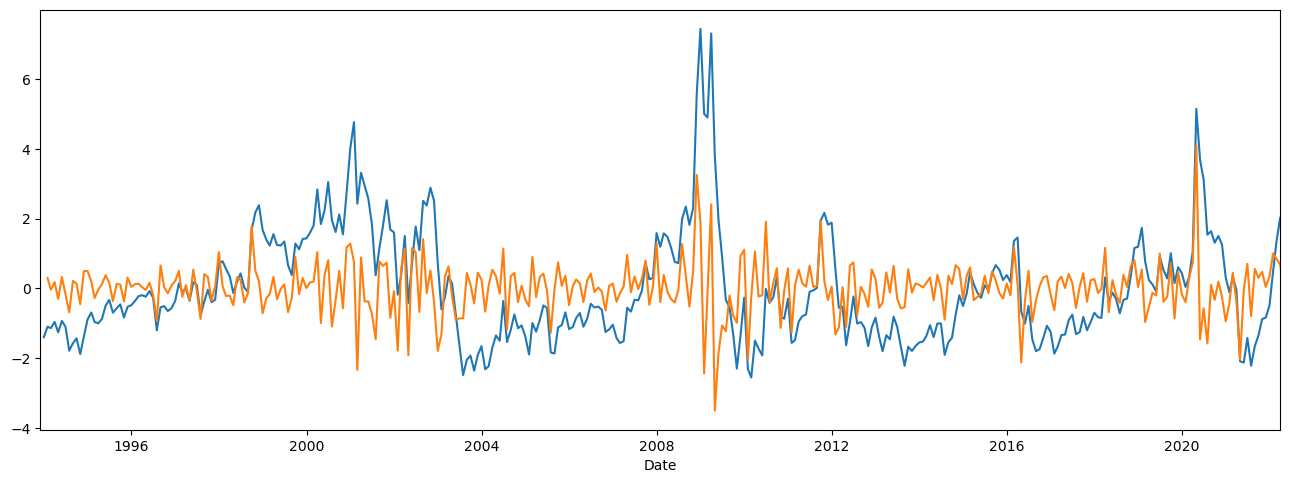

In [282]:
plt.figure(figsize=(16,12))

ax = plt.subplot(211)

ax.plot(sent_factors['test_index'], label = 'test_index')

ax.plot(sent_factors['gap_test_index'], label = 'gap_test_index')

     
ax.set_xlabel('Date')

ax.set_xlim([dt.datetime(1993,12,1), dt.datetime(2022,3,31)])

plt.show()


In [283]:
sent_factors.describe()

,dt_mom_btm_ew,dt_mom_btm_w,dt_mom_adj_btm_ew,dt_mom_adj_btm_w,dt_btm_w,dt_btm_ew,btm_ew_gap,dt_adj_btm_w,dt_adj_btm_ew,adj_btm_ew_gap,...,det_spread,det_maxgap_spread,w_netbuy_avg,dt_w_netbuy_avg,dt_ew_netbuy_avg,all_index,test_index,1+retx,l_test_index,gap_test_index
count,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,...,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,3.410000e+02,341.000000,341.000000,341.000000,340.000000,340.000000
mean,5.925531e-17,-1.172083e-17,3.858106e-16,-1.823240e-17,-2.311608e-17,4.167406e-17,2.630675e-16,3.337181e-17,-2.962765e-17,9.458058e-17,...,6.576688e-17,-5.860415e-18,-2.637187e-17,-2.799976e-17,-6.674361e-17,0.034337,-0.006892,1.007531,-0.012398,0.009603
std,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,...,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,1.001470e+00,2.349784,1.567573,0.045354,1.566577,0.763516
min,-3.768978e+00,-3.118024e+00,-3.905906e+00,-2.857506e+00,-5.299768e+00,-7.525628e+00,-6.375448e+00,-5.537146e+00,-6.821176e+00,-6.555408e+00,...,-2.607432e+00,-2.402213e+00,-1.534793e+00,-5.357041e+00,-5.474471e+00,-4.621391,-2.556704,0.784310,-2.556704,-3.505608
25%,-6.316978e-01,-7.085070e-01,-6.346204e-01,-6.320484e-01,-4.805714e-01,-3.232447e-01,-4.206765e-01,-3.875701e-01,-3.398594e-01,-3.340342e-01,...,-6.767928e-01,-6.861743e-01,-6.680691e-01,-4.339889e-01,-3.703563e-01,-1.478708,-1.106220,0.987202,-1.106228,-0.346811
50%,1.162809e-01,3.524009e-02,9.171173e-02,4.773690e-02,7.586356e-02,4.179813e-02,2.422725e-01,6.744698e-02,2.082344e-02,2.543205e-01,...,4.436271e-02,-8.193549e-02,-2.387081e-01,3.404273e-02,1.198973e-01,-0.442402,-0.343546,1.012925,-0.351394,0.046543
75%,7.534661e-01,7.362794e-01,6.680626e-01,5.873190e-01,5.548749e-01,5.151599e-01,6.913220e-01,4.538768e-01,3.541523e-01,6.452755e-01,...,7.333691e-01,6.512076e-01,3.764735e-01,6.465762e-01,4.964067e-01,1.240532,0.772027,1.032951,0.764140,0.388070
max,2.224497e+00,2.504335e+00,2.964841e+00,3.638632e+00,2.923341e+00,3.186270e+00,1.267242e+00,4.041390e+00,4.786546e+00,1.172634e+00,...,2.392264e+00,3.736854e+00,2.931181e+00,1.834094e+00,2.291474e+00,15.550719,7.443796,1.187412,7.443796,4.092167


In [284]:
# define the mapping between old and new values
mapping = {-1: 'B', 0: 'M', 1: 'T'}
ccm4['port_grp'] = ccm4['portscore_port'].replace(mapping) 
ccm4['adj_grp'] = ccm4['adjscore_port'].replace(mapping) 

In [285]:
ccm4.columns

Index(['mthcaldt', 'permno', 'sharetype', 'securitytype', 'securitysubtype',
       'usincflg', 'issuertype', 'primaryexch', 'conditionaltype',
       'tradingstatusflg', 'mthret', 'lme', 'me', 'wt', 'cumretx', 'quarter',
       'jdate', 'mom', 'mthvol', 'shrout', 'ffi48', 'beme', 'bm_adj', 'be',
       'lbe', 'bmport', 'szport', 'posbm', 'nonmissport', 'bmadjport',
       'adjscore_port', 'portscore_port', 'mom_port', 'mom_adj_port',
       'lcumvol', 'mebase', 'beme1', 'net_buy', 'port_grp', 'adj_grp'],
      dtype='object')

In [286]:
############################
# Form Fama French Factors #
############################

# function to calculate value weighted return
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [287]:
# value-weigthed return
vwret=ccm4.groupby(['jdate','szport','bmport']).apply(wavg, 'mthret','wt').to_frame().reset_index().rename(columns={0: 'vwret'})
vwret['sbport']=vwret['szport']+vwret['bmport']

# firm count
vwret_n=ccm4.groupby(['jdate','szport','bmport'])['mthret'].count().reset_index().rename(columns={'mthret':'n_firms'})
vwret_n['sbport']=vwret_n['szport']+vwret_n['bmport']


In [288]:
# value-weigthed port +adj return

portscore_vwret = ccm4.groupby(['jdate','port_grp']).apply(wavg, 'mthret','wt').to_frame().reset_index().rename(columns={0: 'ptvwret'})
adjscore_vwret =  ccm4.groupby(['jdate','adj_grp']).apply(wavg, 'mthret','wt').to_frame().reset_index().rename(columns={0: 'adjvwret'})

# value-weighted return for ff + port/adj portfolio 

ff_portscore_vwret = ccm4.groupby(['jdate','port_grp','szport','bmport']).apply(wavg, 'mthret','wt').to_frame().reset_index().rename(columns={0: 'ptvwret'})
ff_adjscore_vwret = ccm4.groupby(['jdate','adj_grp','szport','bmport']).apply(wavg, 'mthret','wt').to_frame().reset_index().rename(columns={0: 'adjvwret'})


# firm count
pt_vwret_n=ccm4.groupby(['jdate','port_grp'])['mthret'].count().reset_index().rename(columns={'mthret':'n_firms'})
adj_vwret_n=ccm4.groupby(['jdate','adj_grp'])['mthret'].count().reset_index().rename(columns={'mthret':'n_firms'})

ff_pt_vwret_n=ccm4.groupby(['jdate','port_grp','szport','bmport'])['mthret'].count().reset_index().rename(columns={'mthret':'n_firms'})
ff_adj_vwret_n=ccm4.groupby(['jdate','adj_grp','szport','bmport'])['mthret'].count().reset_index().rename(columns={'mthret':'n_firms'})


In [289]:
ff_portscore_vwret['finalport']=ff_portscore_vwret['szport']+ff_portscore_vwret['bmport'] +ff_portscore_vwret['port_grp']
ff_adjscore_vwret['finalport']=ff_adjscore_vwret['szport']+ff_adjscore_vwret['bmport'] +ff_adjscore_vwret['adj_grp']


ff_pt_vwret_n['finalport'] = ff_pt_vwret_n['szport'] + ff_pt_vwret_n['bmport'] + ff_pt_vwret_n['port_grp']
ff_adj_vwret_n['finalport'] = ff_adj_vwret_n['szport'] + ff_adj_vwret_n['bmport'] + ff_adj_vwret_n['adj_grp']

In [290]:
ff_pt_vwret_n[ff_pt_vwret_n['jdate'] == '2022-06-30']

,jdate,port_grp,szport,bmport,n_firms,finalport
7002,2022-06-30,B,B,H,67,BHB
7003,2022-06-30,B,B,L,39,BLB
7004,2022-06-30,B,B,M,200,BMB
7005,2022-06-30,B,S,H,304,SHB
7006,2022-06-30,B,S,L,31,SLB
7007,2022-06-30,B,S,M,269,SMB
7008,2022-06-30,M,B,H,83,BHM
7009,2022-06-30,M,B,L,401,BLM
7010,2022-06-30,M,B,M,534,BMM
7011,2022-06-30,M,S,H,403,SHM


In [291]:
ff_adj_vwret_n[ff_adj_vwret_n['jdate'] == '2022-06-30']

,jdate,adj_grp,szport,bmport,n_firms,finalport
7002,2022-06-30,B,B,H,74,BHB
7003,2022-06-30,B,B,L,33,BLB
7004,2022-06-30,B,B,M,199,BMB
7005,2022-06-30,B,S,H,290,SHB
7006,2022-06-30,B,S,L,30,SLB
7007,2022-06-30,B,S,M,269,SMB
7008,2022-06-30,M,B,H,77,BHM
7009,2022-06-30,M,B,L,442,BLM
7010,2022-06-30,M,B,M,597,BMM
7011,2022-06-30,M,S,H,414,SHM


In [292]:
# tranpose the factors
port_factors = portscore_vwret.pivot(index='jdate', columns='port_grp', values='ptvwret').reset_index()
adjport_factors = adjscore_vwret.pivot(index='jdate', columns='adj_grp', values='adjvwret').reset_index().add_prefix('adj_')
ff_port_factors = ff_portscore_vwret.pivot(index='jdate', columns='finalport', values='ptvwret').reset_index()
ff_adj_factors = ff_adjscore_vwret.pivot(index='jdate', columns= 'finalport', values='adjvwret').reset_index().add_prefix('adj_')

# transpose the firm count
port_nfirms = pt_vwret_n.pivot(index='jdate', columns='port_grp', values='n_firms').reset_index()
adj_nfirms = adj_vwret_n.pivot(index='jdate', columns='adj_grp', values='n_firms').reset_index().add_prefix('adj_')
ff_port_nfirms = ff_pt_vwret_n.pivot(index='jdate', columns='finalport', values='n_firms').reset_index()
ff_adj_nfirms = ff_adj_vwret_n.pivot(index='jdate', columns='finalport', values='n_firms').reset_index().add_prefix('adj_')


In [293]:
# find market return
mktret = ccm4.groupby(['jdate']).apply(wavg, 'mthret','wt').to_frame().reset_index().rename(columns={0: 'mktret'})

In [294]:
# tranpose
ff_factors=vwret.pivot(index='jdate', columns='sbport', values='vwret').reset_index()
ff_nfirms=vwret_n.pivot(index='jdate', columns='sbport', values='n_firms').reset_index()

# create SMB and HML factors
ff_factors['WH']=(ff_factors['BH']+ff_factors['SH'])/2
ff_factors['WL']=(ff_factors['BL']+ff_factors['SL'])/2
ff_factors['WHML'] = ff_factors['WH']-ff_factors['WL']

ff_factors['WB']=(ff_factors['BL']+ff_factors['BM']+ff_factors['BH'])/3
ff_factors['WS']=(ff_factors['SL']+ff_factors['SM']+ff_factors['SH'])/3
ff_factors['WSMB'] = ff_factors['WS']-ff_factors['WB']
ff_factors=ff_factors.rename(columns={'jdate':'date'})

# n firm count
ff_nfirms['H']=ff_nfirms['SH']+ff_nfirms['BH']
ff_nfirms['L']=ff_nfirms['SL']+ff_nfirms['BL']
ff_nfirms['HML']=ff_nfirms['H']+ff_nfirms['L']

ff_nfirms['B']=ff_nfirms['BL']+ff_nfirms['BM']+ff_nfirms['BH']
ff_nfirms['S']=ff_nfirms['SL']+ff_nfirms['SM']+ff_nfirms['SH']
ff_nfirms['SMB']=ff_nfirms['B']+ff_nfirms['S']
ff_nfirms['TOTAL']=ff_nfirms['SMB']
ff_nfirms=ff_nfirms.rename(columns={'jdate':'date'})

In [295]:
ff_factors = pd.merge(ff_factors, mktret, left_index=True, right_index=True)

In [296]:
final_sent_factors = sent_factors[['test_index'] + pca_col]
final_sent_factors.to_csv('final_sent_factors.csv')

In [297]:
###################
# Compare With FF #
###################
_ff = db.get_table(library='ff', table='factors_monthly')
_ff=_ff[['date','smb','hml','rf','mktrf']]
_ff['date']=_ff['date']+MonthEnd(0)

_ffcomp = pd.merge(_ff, ff_factors[['date','WSMB','WHML','mktret']], how='inner', on='date')
_ffcomp70=_ffcomp[_ffcomp['date']>='01/01/1970']


print(stats.pearsonr(_ffcomp70['smb'], _ffcomp70['WSMB']))
print(stats.pearsonr(_ffcomp70['hml'], _ffcomp70['WHML']))

(0.7848531465470223, 6.651691629860193e-84)
(0.7203145421391511, 1.4259329701962727e-64)


In [298]:
_ffcomp.set_index('date', inplace=True)
_ffcomp.tail(2)
ff_factors.set_index('date', inplace=True)


In [299]:
for i in [port_factors,adjport_factors,ff_port_factors,ff_adj_factors]:
    i.rename_axis(None, axis = 1, inplace=True)
    if 'jdate' in i.columns:
        i.set_index('jdate', inplace = True)
    else:
        i.set_index('adj_jdate', inplace = True)
    i.index.name = 'date'

In [300]:
ff_slim = ff_factors[['BH','BL','BM','SH','SL','SM','WH','WL','WB','WS']]

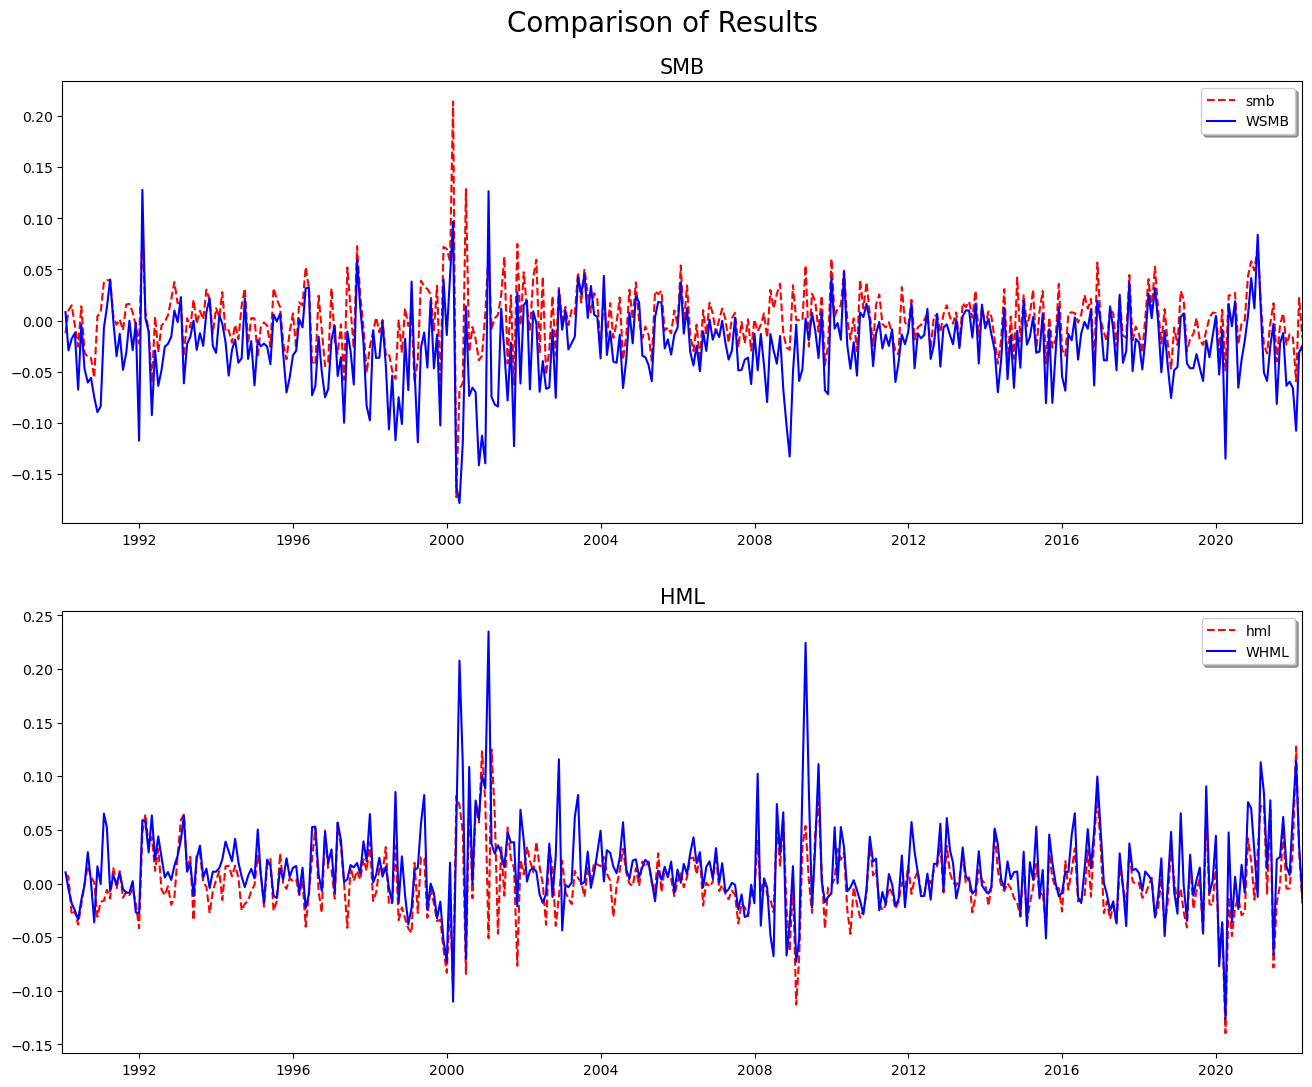

In [301]:
plt.figure(figsize=(16,12))
plt.suptitle('Comparison of Results', fontsize=20)

ax1 = plt.subplot(211)
ax1.set_title('SMB', fontsize=15)
ax1.set_xlim([dt.datetime(1990,1,1), dt.datetime(2022,3,31)])
ax1.plot(_ffcomp['smb'], 'r--', _ffcomp['WSMB'], 'b-')
ax1.legend(('smb','WSMB'), loc='upper right', shadow=True)

ax2 = plt.subplot(212)
ax2.set_title('HML', fontsize=15)
ax2.plot(_ffcomp['hml'], 'r--', _ffcomp['WHML'], 'b-')
ax2.set_xlim([dt.datetime(1990,1,1), dt.datetime(2022,3,31)])
ax2.legend(('hml','WHML'), loc='upper right', shadow=True)

plt.subplots_adjust(top=0.92, hspace=0.2)

plt.show()

In [302]:
final_factors = pd.merge(_ffcomp, sent_factors[['test_index']], left_index=True, right_index=True)
final_factors['scaled_index']= sc.fit_transform(final_factors[['test_index']])

In [303]:
final_factors['mrmrf'] = final_factors['mktret'] - final_factors['rf']

In [304]:
from scipy.stats import linregress
df = final_factors[['mrmrf','WSMB','WHML']]
ff_r2 = pd.DataFrame(index=df.columns, columns=df.columns)
ff_p = pd.DataFrame(index=df.columns, columns=df.columns)
ff_corr = (pd.DataFrame(df).corr())
for col1 in df.columns:
    for col2 in df.columns:
        x = df[col1]
        y = df[col2]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r_squared = r_value ** 2
        ff_r2.loc[col1, col2] = r_squared
        ff_p.loc[col1,col2] = p_value

ff_corr_matrix = np.corrcoef(df.values.T)
ff_eig_values, ff_eig_vectors = np.linalg.eig(ff_corr_matrix)


In [305]:
ff_corr.to_csv('ff_corr.csv')
ff_r2.to_csv('ff_r2.csv')
ff_p.to_csv('ff_p.csv')

In [306]:
df = final_factors[['mrmrf','WSMB','WHML','test_index']]
ffs_r2 = pd.DataFrame(index=df.columns, columns=df.columns)
ffs_p = pd.DataFrame(index=df.columns, columns=df.columns)
ffs_corr = (pd.DataFrame(df).corr())
for col1 in df.columns:
    for col2 in df.columns:
        x = df[col1]
        y = df[col2]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r_squared = r_value ** 2
        ffs_r2.loc[col1, col2] = r_squared
        ffs_p.loc[col1,col2] = p_value

ffs_corr_matrix = np.corrcoef(df.values.T)
ffs_eig_values, ffs_eig_vectors = np.linalg.eig(ffs_corr_matrix)


In [307]:
ffs_corr_matrix

array([[ 1.        ,  0.25700357,  0.09270619, -0.05235253],
       [ 0.25700357,  1.        , -0.10013419, -0.19882424],
       [ 0.09270619, -0.10013419,  1.        ,  0.11607694],
       [-0.05235253, -0.19882424,  0.11607694,  1.        ]])

In [308]:
ffs_eig_values, ffs_eig_vectors

(array([1.36732316, 1.11784936, 0.67278295, 0.84204453]),
 array([[-0.48925822, -0.58313919, -0.6031231 ,  0.23836442],
        [-0.675868  , -0.0723392 ,  0.70208842,  0.21222944],
        [ 0.22041728, -0.73357315,  0.30729381, -0.56467439],
        [ 0.50521783, -0.34144716,  0.22109926,  0.76110702]]))

In [309]:
ffs_corr.to_csv('ffs_corr.csv')
ffs_r2.to_csv('ffs_r2.csv')
ffs_p.to_csv('ffs_p.csv')

In [310]:
for i in [port_factors,adjport_factors,ff_port_factors,ff_adj_factors, ff_slim]:
    final_factors = pd.merge(final_factors, i, how = 'left', left_index=True, right_index=True)

In [311]:
# This Portion of the code identify the necessary steps need to be taken in order to compare if sent factor improves

import statsmodels.api as sm
X0 = final_factors[['mrmrf','WSMB','WHML']]
X1 = final_factors[['mrmrf','WSMB','WHML','test_index']]
sent = final_factors[['scaled_index']]
portfolio_factors = final_factors.drop(['WSMB','WHML','scaled_index','smb','hml','rf', 'test_index'],axis=1)
ff_model_comp = pd.DataFrame(index = portfolio_factors.columns)
ffs_model_comp = pd.DataFrame(index = portfolio_factors.columns)
sent_model_comp = pd.DataFrame(index = portfolio_factors.columns)

for i in portfolio_factors.columns:
    y = final_factors[i]
    X0 = sm.add_constant(X0)
    est0 = sm.OLS(y, X0).fit()
    r_2 =est0.rsquared
    adj_r_2 = est0.rsquared_adj
    f_p = est0.f_pvalue
    aic = est0.aic
    bic = est0.bic
    ff_model_comp.loc[i,'R2'] = r_2
    ff_model_comp.loc[i,'Adj_R2'] =  adj_r_2
    ff_model_comp.loc[i,'F_p'] = f_p
    ff_model_comp.loc[i,'aic'] = aic
    ff_model_comp.loc[i,'bic'] = bic

for i in portfolio_factors.columns:
    y = final_factors[i]
    X1 = sm.add_constant(X1)
    est0 = sm.OLS(y, X1).fit()
    r_2 =est0.rsquared
    adj_r_2 = est0.rsquared_adj
    f_p = est0.f_pvalue
    aic = est0.aic
    bic = est0.bic
    ffs_model_comp.loc[i,'R2'] = r_2
    ffs_model_comp.loc[i,'Adj_R2'] =  adj_r_2
    ffs_model_comp.loc[i,'F_p'] = f_p
    ffs_model_comp.loc[i,'aic'] = aic
    ffs_model_comp.loc[i,'bic'] = bic
    
for i in portfolio_factors.columns:
    y = final_factors[i]
    sent = sm.add_constant(sent)
    est0 = sm.OLS(y, sent).fit()
    r_2 =est0.rsquared
    adj_r_2 = est0.rsquared_adj
    f_p = est0.f_pvalue
    aic = est0.aic
    bic = est0.bic
    sent_model_comp.loc[i,'R2'] = r_2
    sent_model_comp.loc[i,'Adj_R2'] =  adj_r_2
    sent_model_comp.loc[i,'F_p'] = f_p
    sent_model_comp.loc[i,'aic'] = aic
    sent_model_comp.loc[i,'bic'] = bic

In [312]:
sent_model_comp

,R2,Adj_R2,F_p,aic,bic
mktrf,0.002850,-0.000092,0.325696,-1153.166708,-1145.502943
mktret,0.002169,-0.000775,0.391286,-1157.718032,-1150.054267
mrmrf,0.002741,-0.000201,0.335115,-1157.206677,-1149.542912
B,0.005697,0.002764,0.164343,-990.967566,-983.303801
M,0.001773,-0.001172,0.438371,-1200.588048,-1192.924283
T,0.000626,-0.002322,0.645114,-1069.367843,-1061.704078
adj_B,0.005465,0.002531,0.173204,-1018.250913,-1010.587148
adj_M,0.001131,-0.001816,0.536031,-1174.449829,-1166.786064
adj_T,0.001767,-0.001177,0.439055,-1095.317033,-1087.653268
BHB,0.000568,-0.002380,0.660967,-753.468862,-745.805097


In [313]:
ff_model_comp

,R2,Adj_R2,F_p,aic,bic
mktrf,0.998128,0.998112,0.000000e+00,-3289.986616,-3274.659086
mktret,0.998476,0.998462,0.000000e+00,-3364.771527,-3349.443997
mrmrf,1.000000,1.000000,0.000000e+00,-21386.081434,-21370.753904
B,0.877322,0.876230,3.939835e-153,-1700.503914,-1685.176384
M,0.969085,0.968810,5.676464e-254,-2381.471390,-2366.143860
T,0.903539,0.902680,1.019218e-170,-1862.621613,-1847.294083
adj_B,0.871756,0.870614,6.940655e-150,-1712.734807,-1697.407277
adj_M,0.969963,0.969695,4.421338e-256,-2365.378652,-2350.051122
adj_T,0.905356,0.904514,4.137572e-172,-1894.667588,-1879.340059
BHB,0.825480,0.823927,2.377992e-127,-1344.564457,-1329.236927


In [314]:
ff_model_comp.to_csv('ff_model_comp.csv')
ffs_model_comp.to_csv('ffs_model_comp.csv')
sent_model_comp.to_csv('sent_model_comp.csv')

In [315]:
X0 = final_factors[['mrmrf','WSMB','WHML']]
X1 = final_factors[['mrmrf','WSMB','WHML','test_index']]
sent = final_factors[['test_index']]
portfolio_factors = final_factors.drop(['WSMB','WHML','scaled_index','smb','hml','rf', 'test_index'],axis=1)

ff_coeff = pd.DataFrame()
ff_coeff_p = pd.DataFrame()

for i in portfolio_factors.columns:
    y = final_factors[i]
    X0 = sm.add_constant(X0)
    model = sm.OLS(y, X0).fit()
    coefficients = model.params
    p_values = model.pvalues
    ff_coeff.loc[i,['mrmrf','WSMB','WHML']] = coefficients
    ff_coeff_p.loc[i,['mrmrf','WSMB','WHML']] = p_values

    
ffs_coeff = pd.DataFrame()
ffs_coeff_p = pd.DataFrame()

for i in portfolio_factors.columns:
    y = final_factors[i]
    X1 = sm.add_constant(X1)
    model = sm.OLS(y, X1).fit()
    coefficients = model.params
    p_values = model.pvalues
    ffs_coeff.loc[i,['mrmrf','WSMB','WHML','test_index']] = coefficients
    ffs_coeff_p.loc[i,['mrmrf','WSMB','WHML','test_index']] = p_values

sent_coeff = pd.DataFrame()
sent_coeff_p = pd.DataFrame()

for i in portfolio_factors.columns:
    y = final_factors[i]
    sent = sm.add_constant(sent)
    model = sm.OLS(y, sent).fit()
    coefficients = model.params
    p_values = model.pvalues
    sent_coeff.loc[i,['test_index']] = coefficients
    sent_coeff_p.loc[i,['test_index']] = p_values    
    
for i in [ff_coeff_p, ffs_coeff_p]:
    i['mrmrf_sig'] = i['mrmrf']<0.05
    i['WSMB_sig']  = i['WSMB']<0.05
    i['WHML_sig']  = i['WHML']<0.05

    
ffs_coeff_p['test_sig'] = ffs_coeff_p['test_index'] < 0.05
sent_coeff_p['test_sig'] = sent_coeff_p['test_index'] < 0.05

In [316]:
final_sent_comp =  pd.DataFrame()

sent = final_factors[['test_index']]

for i in pca_col:
    y = final_sent_factors[i]
    X = sm.add_constant(sent)
    model = sm.OLS(y, X).fit()
    coefficients = model.params
    p_values = model.pvalues
    final_sent_comp.loc[i,['test_index']] = coefficients


In [317]:
final_sent_comp.to_csv('final_sent_comp.csv')
ff_coeff.to_csv('ff_coeff.csv')
ff_coeff_p.to_csv('ff_coeff_p.csv')
ffs_coeff.to_csv('ffs_coeff.csv')
ffs_coeff_p.to_csv('ffs_coeff_p.csv')
sent_coeff.to_csv('sent_coeff.csv')
sent_coeff_p.to_csv('sent_coeff_p.csv')



In [318]:
ffs_coeff_p[ffs_coeff_p['test_sig'] == True]['test_sig']

mktret     True
mrmrf      True
B          True
T          True
adj_B      True
adj_M      True
BHM        True
BHT        True
BLT        True
BMB        True
BMT        True
SHB        True
SHM        True
SHT        True
SMT        True
adj_BHM    True
adj_BHT    True
adj_BLB    True
adj_BLM    True
adj_BMB    True
adj_BMT    True
adj_SHB    True
adj_SHM    True
adj_SHT    True
adj_SMT    True
BL         True
WH         True
WL         True
Name: test_sig, dtype: bool

In [319]:
sent_coeff_p[sent_coeff_p['test_sig'] == True]['test_sig']

BHM        True
SHB        True
SLB        True
SLM        True
SLT        True
SMB        True
SMM        True
adj_BHT    True
adj_SHB    True
adj_SLB    True
adj_SLM    True
adj_SLT    True
adj_SMB    True
adj_SMM    True
SL         True
SM         True
WL         True
WS         True
Name: test_sig, dtype: bool

In [320]:
print(pd.DataFrame(final_sent).corr())

                dt_mom_btm_ew  dt_btm_ew  dt_turn_rat       vix  det_spread  \
dt_mom_btm_ew        1.000000   0.521704    -0.356102 -0.547266    0.137646   
dt_btm_ew            0.521704   1.000000    -0.331385 -0.464506    0.305782   
dt_turn_rat         -0.356102  -0.331385     1.000000  0.255848   -0.083125   
vix                 -0.547266  -0.464506     0.255848  1.000000   -0.204053   
det_spread           0.137646   0.305782    -0.083125 -0.204053    1.000000   
w_netbuy_avg        -0.351386  -0.119986     0.043835  0.310594   -0.062939   
test_index          -0.820655  -0.764770     0.472386  0.781507   -0.364120   
gap_test_index      -0.167809  -0.250458     0.162764  0.122895   -0.358752   

                w_netbuy_avg  test_index  gap_test_index  
dt_mom_btm_ew      -0.351386   -0.820655       -0.167809  
dt_btm_ew          -0.119986   -0.764770       -0.250458  
dt_turn_rat         0.043835    0.472386        0.162764  
vix                 0.310594    0.781507        0.12

In [321]:
sent_index = final_sent[['test_index']]

In [322]:
model1 = sm.OLS(sent_index.loc[test_start_date:test_end_date], final_sent[pca_col].loc[test_start_date:test_end_date]).fit()


In [323]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:             test_index   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.334e+05
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                   5.24e-161
Time:                        00:54:52   Log-Likelihood:                          276.02
No. Observations:                  76   AIC:                                     -540.0
Df Residuals:                      70   BIC:                                     -526.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [324]:
# the explained variance ratio of each component can be found in pca.explained_variance_ratio_
print(pca1.explained_variance_ratio_)


# the factor loadings matricx is stored in pca.components_
print(factor_loadings)

# the sum of the squared factor loadings for each variable is the communality of that variable
print(communality)


[0.42172037]
[[-0.50215907 -0.52728186  0.22801991  0.4886853  -0.19736824  0.37423186]]
[0.25216373 0.27802616 0.05199308 0.23881332 0.03895422 0.14004949]


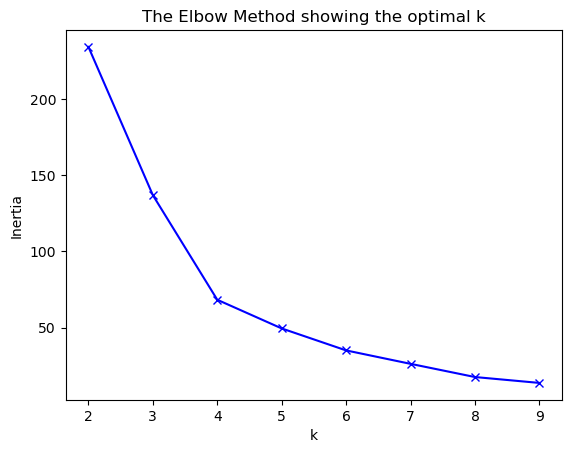

3


"\n    train_data = df.loc[train_start_date:train_end_date]\n    test_data = df.loc[test_start_date:test_end_date]\n    \n    k_values = range(1, 10)\n    sse = []\n    for k in k_values:\n        kmeans = KMeans(n_clusters=k, random_state=42)\n        kmeans.fit(train_data[['sent']])\n        sse.append(kmeans.inertia_)\n    k_optimal = k_values[np.argmin(np.diff(sse))+1]   \n    # perform KMeans clustering on the full dataset with the optimal k value\n    kmeans = KMeans(n_clusters=k_optimal, random_state=42)\n\n    # continued from previous code snippet\n    kmeans.fit(train_data[['sent']])\n    \n    sorted_labels = np.argsort(kmeans.cluster_centers_.reshape(-1))\n\n    # index test data and train data with the labels generated by KMeans\n    train_data['cluster_labels'] = kmeans.labels_\n    test_data['cluster_labels'] = kmeans.predict(test_data[['sent']])\n    df = pd.concat([train_data, test_data])"

In [325]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

k_values = range(2, 10)

# Define the training and testing sets


train_sent = final_sent[['test_index']].loc[train_start_date:train_end_date]
test_sent = final_sent[['test_index']].loc[test_start_date:test_end_date]

sse = []

inertias = []

K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_sent)
    sse.append(kmeans.inertia_)
    inertias.append(kmeans.inertia_)

k_optimal = k_values[np.argmin(np.diff(sse))+1]
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()




print(k_optimal)

'''
    train_data = df.loc[train_start_date:train_end_date]
    test_data = df.loc[test_start_date:test_end_date]
    
    k_values = range(1, 10)
    sse = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(train_data[['sent']])
        sse.append(kmeans.inertia_)
    k_optimal = k_values[np.argmin(np.diff(sse))+1]   
    # perform KMeans clustering on the full dataset with the optimal k value
    kmeans = KMeans(n_clusters=k_optimal, random_state=42)

    # continued from previous code snippet
    kmeans.fit(train_data[['sent']])
    
    sorted_labels = np.argsort(kmeans.cluster_centers_.reshape(-1))

    # index test data and train data with the labels generated by KMeans
    train_data['cluster_labels'] = kmeans.labels_
    test_data['cluster_labels'] = kmeans.predict(test_data[['sent']])
    df = pd.concat([train_data, test_data])'''

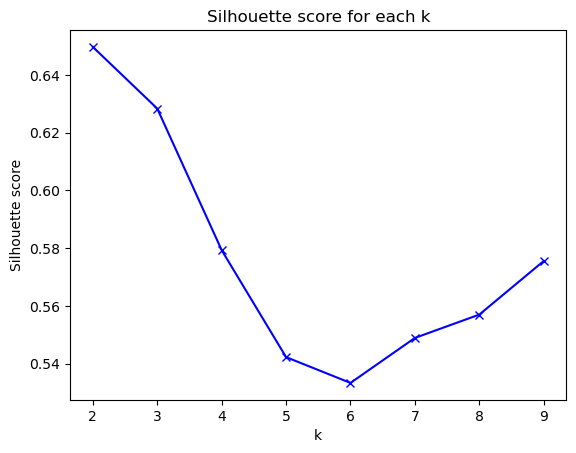

In [326]:
from sklearn.metrics import silhouette_score

silhouette_scores = []



K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_sent)
    score = silhouette_score(train_sent, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for each k')
plt.show()

In [327]:
## from sklearn.cluster import KMeans


k_values = range(2, 10)

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_sent)
    sse.append(kmeans.inertia_)
k_optimal = k_values[np.argmin(np.diff(sse))+1]   
# perform KMeans clustering on the full dataset with the optimal k value
kmeans = KMeans(n_clusters=5, random_state=42)

# continued from previous code snippet
kmeans.fit(train_sent)
    
sorted_labels = np.argsort(kmeans.cluster_centers_.reshape(-1))

# index test data and train data with the labels generated by KMeans
train_sent['cluster_labels'] = kmeans.labels_
test_sent['cluster_labels'] = kmeans.predict(test_sent)
sent = pd.concat([train_sent, test_sent])


In [328]:
# calculate mean sentiment index for each cluster label
means = sent.groupby('cluster_labels')['test_index'].mean()

# sort the means in ascending order
sorted_means = means.sort_values()

# create a dictionary to map old label values to new ones based on sorted means
new_labels = {label: i for i, label in enumerate(sorted_means.index)}

# update the dataframe with new label values
sent['new_cluster_label'] = sent['cluster_labels'].map(new_labels)

In [329]:
sent.groupby(['new_cluster_label']).agg({'test_index':['mean','max','min','std','count']})

test_index                                    
                        mean       max       min       std count
new_cluster_label                                               
0                  -1.554371 -1.040654 -2.556704  0.371673    94
1                  -0.515097  0.040639 -1.010199  0.308205   116
2                   0.605112  1.308662  0.089650  0.380124    64
3                   2.014411  3.688053  1.343577  0.551464    58
4                   5.327673  7.443796  3.803455  1.282080     9

## from sklearn.cluster import KMeans


k_values = range(2, 10)

sse = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_sent)
    sse.append(kmeans.inertia_)
k_optimal = k_values[np.argmin(np.diff(sse))+1]   
# perform KMeans clustering on the full dataset with the optimal k value
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

# continued from previous code snippet
kmeans.fit(train_sent)
    
sorted_labels = np.argsort(kmeans.cluster_centers_.reshape(-1))

# index test data and train data with the labels generated by KMeans
train_sent['cluster_labels'] = kmeans.labels_
test_sent['cluster_labels'] = kmeans.predict(test_sent)
final_sent = pd.concat([train_sent, test_sent])


In [330]:
quintile_thresholds = train_sent['test_index'].quantile([0.2, 0.4, 0.6, 0.8]).values

def assign_quintile(value, thresholds):
    if value <= thresholds[0]:
        return 0
    elif value <= thresholds[1]:
        return 1
    elif value <= thresholds[2]:
        return 2
    elif value <= thresholds[3]:
        return 3
    else:
        return 4
    
test_sent['lvl'] = test_sent['test_index'].apply(lambda x: assign_quintile(x, quintile_thresholds))
train_sent['lvl'] = pd.qcut(train_sent['test_index'],q=5, labels = False)
sent['lvl'] = pd.concat([train_sent['lvl'], test_sent['lvl']])


In [331]:
test_sent.groupby('lvl').agg({'test_index':['mean','max','min','std','count']})

test_index                                    
          mean       max       min       std count
lvl                                               
0    -1.678964 -1.325390 -2.217172  0.309199    14
1    -0.959534 -0.698562 -1.310992  0.201678    16
2    -0.327643 -0.090381 -0.664665  0.189026    10
3     0.617323  1.361816 -0.052465  0.457776    26
4     2.373393  5.151311  1.459483  1.229519    10

In [332]:
train_sent.groupby('lvl').agg({'test_index':['mean','max','min','std','count']})

test_index                                    
          mean       max       min       std count
lvl                                               
0    -1.723662 -1.342191 -2.556704  0.323627    53
1    -0.978896 -0.687641 -1.311540  0.168394    53
2    -0.381319 -0.098332 -0.665289  0.159034    53
3     0.525379  1.397673 -0.076982  0.443165    53
4     2.558498  7.443796  1.419481  1.365783    53

In [333]:
mktret = final_factors[['mktret']]
rf = final_factors[['rf']]
sent_lvl = sent[['lvl']]
sent_cluster = sent[['new_cluster_label']]

In [334]:
final_factors['sent_lvl'] = sent_lvl
final_factors['new_cluster_label'] = sent_cluster
final_factors.to_csv('final_factors.csv') 

In [335]:
ff_6 = ff_slim[['BH', 'BL', 'BM', 'SH', 'SL', 'SM']]
ff_w3 = ff_slim[[ 'WH', 'WL']]
ff_w3['WM'] = (ff_slim['BM'] + ff_slim['SM'])/2
ff_w2 = ff_slim[[ 'WB', 'WS']] 

C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\923419121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_w3['WM'] = (ff_slim['BM'] + ff_slim['SM'])/2


In [336]:
for i in [port_factors,adjport_factors,ff_port_factors,ff_adj_factors, ff_6, ff_w3, ff_w2, mktret, rf]:
    i.loc[:,'rf'] = final_factors[['rf']]
    i.loc[:,'sent'] = sent['test_index']
    i['sent_lvl'] = sent[['lvl']]
    i['sent_pt'] = sent_cluster

C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\3877113771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:,'rf'] = final_factors[['rf']]
C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\3877113771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.loc[:,'sent'] = sent['test_index']
C:\Users\jackc\AppData\Local\Temp\ipykernel_5784\3877113771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [337]:
ret_dict = {}
ret_list = [port_factors,adjport_factors,ff_port_factors,ff_adj_factors, ff_6, ff_w3, ff_w2]
ret_list_str = ['port_factors','adjport_factors','ff_port_factors','ff_adj_factors', 'ff_6', 'ff_w3','ff_w2']
for i in range(len(ret_list)):
    ret_dict[ret_list_str[i]] = ret_list[i]
    

In [338]:
ret_dict_1 = {}

new_ret_list = [i.copy() for i in ret_list]

for i in range(len(ret_list)):
    ret_dict_1[ret_list_str[i]] = new_ret_list[i]
    

In [339]:
ret_comp = pd.DataFrame()
sent_ret_comp = pd.DataFrame()
sent_sr_comp = pd.DataFrame()
sent_weight_comp = {}


ret_comp_1 = pd.DataFrame()
sent_ret_comp_1 = pd.DataFrame()
sent_sr_comp_1 = pd.DataFrame()
sent_weight_comp_1 = {}

train_dict = {}
test_dict = {}

ret_dict_result = {}

In [340]:
test_ret_comp = pd.DataFrame()
test_sent_ret_comp = pd.DataFrame()
test_sent_sr_comp = pd.DataFrame()

train_ret_comp = pd.DataFrame()
train_sent_ret_comp = pd.DataFrame()
train_sent_sr_comp = pd.DataFrame()


In [341]:
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize

for key in ret_dict.keys():
    df = ret_dict[key].copy()
    df = df.loc[train_start_date:test_end_date]
    sentiment_levels = sorted(df['sent_lvl'].unique())
    port_return = pd.DataFrame()
    
    # Load the data
    
    optimized_weight = pd.DataFrame()
    # Define the training and testing sets
   
    
    train_data = df.loc[train_start_date:train_end_date]
    test_data = df.loc[test_start_date:test_end_date]
    
    
    # Define the objective function
    def objective(weights):
        # calculate portfolio returns
        portfolio_returns = train_returns.mul(weights).sum(axis=1)

        # calculate excess returns
        excess_returns = portfolio_returns - df.loc[train_returns.index, 'rf']

        # calculate portfolio risk (standard deviation)
        portfolio_risk = np.std(excess_returns, ddof = 1)
        
        # calculate Sharpe ratio
        sharpe_ratio = np.mean(excess_returns) / portfolio_risk

        # return the negative of the Sharpe ratio (to maximize the Sharpe ratio)
        return -sharpe_ratio      
    
    # Define the constraints

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                  {'type': 'ineq', 'fun': lambda x: np.sum(x[x>0]) - 1.3 },
                  {'type': 'ineq', 'fun': lambda x: np.sum(x[x<0]) + 0.3})

    n_portfolios = len(df.columns)  - 4
    bounds = [(-1, 1)] * n_portfolios
    
    port_return = pd.DataFrame()
    
    equal_weighted = pd.DataFrame()
    
    
    initial_weights = np.ones(n_portfolios) / n_portfolios  
   
    # Create equal weight
    ew =  np.ones(n_portfolios) / n_portfolios
    
    
    for sentiment in sentiment_levels:
        train_returns = train_data[train_data['sent_lvl'] == sentiment].drop(['sent_lvl','rf','sent_pt','sent'],axis = 1)
        optimized_weights = minimize(objective,initial_weights, bounds = bounds, constraints = constraints).x
        optimized_weight[sentiment] = pd.DataFrame({'weights': optimized_weights}, index=train_returns.columns)

        # Calculate the portfolio returns for the testing set
        port_returns = df[df['sent_lvl'] == sentiment].drop(['sent_lvl','rf','sent_pt','sent'],axis = 1)
        # calculate excess returns
        portfolio_returns = port_returns.mul(optimized_weights).sum(axis=1)
        equal_returns  = port_returns.mul(ew).sum(axis = 1)
        equal_weighted = pd.concat([equal_weighted,equal_returns])
        port_return = pd.concat([port_return, portfolio_returns])
    
    sent_weight_comp[key] = optimized_weight
    
    df['port_return'] = port_return
    df['excess_returns'] = df['port_return'] - df['rf']
    df['mktret'] = mktret['mktret']
    df['mrmrf'] = df['mktret'] - df['rf']
    df['ew_return'] = equal_weighted
    df['ew_excess_returns'] = df['ew_return'] - df['rf']
    df['test/train'] = np.where(df.index.isin(train_data.index), 'train', 'test')
    ret_dict_result[key] = df

In [342]:
for key in ret_dict_result.keys():
    df1 = ret_dict_result[key]
    df = df1[df1['test/train'] == 'test'].copy()

    test_sent_ret_comp[key] = df.groupby('sent_lvl')['port_return'].mean().reset_index().rename(columns={'ret':key}).set_index('sent_lvl')
    test_sent_ret_comp['mktret'] =  df.groupby('sent_lvl')['mktret'].mean().reset_index().set_index('sent_lvl')
    test_sent_ret_comp['excess_returns'] =  df.groupby('sent_lvl')['excess_returns'].mean().reset_index().set_index('sent_lvl')
    test_sent_ret_comp['ew_excess_returns'] =  df.groupby('sent_lvl')['ew_excess_returns'].mean().reset_index().set_index('sent_lvl')

    
    group_stats = df.groupby('sent_lvl').agg({'excess_returns': ['mean','std']})
    group_stats.columns = group_stats.columns.droplevel()                                                                                
    group_stats['sr'] = group_stats['mean']/group_stats['std']*(12**(1/2))
                                                
    mkt_stats = df.groupby('sent_lvl').agg({'mrmrf': ['mean','std']})
    mkt_stats.columns = mkt_stats.columns.droplevel()
    mkt_stats['market_sr'] = mkt_stats['mean']/mkt_stats['std']*(12**(1/2))   
    
    group_stats2 = df.groupby('sent_lvl').agg({'ew_excess_returns': ['mean','std']})
    group_stats2.columns = group_stats2.columns.droplevel()                                                                                
    group_stats2['sr'] = group_stats2['mean']/group_stats2['std']*(12**(1/2))
    
    test_sent_sr_comp[key] = group_stats['sr']
    test_sent_sr_comp['msr'] = mkt_stats['market_sr']
    test_sent_sr_comp['ew_sr'] = group_stats2['sr']

    
    test_ret_comp.loc[key,'excess_returns'] = np.mean(df['excess_returns'])
    test_ret_comp.loc[key,'port_return'] = np.mean(df['port_return'])
    test_ret_comp.loc[key,'mrmrf'] = np.mean(df['mrmrf'])
    test_ret_comp.loc[key,'mktret'] = np.mean(df['mktret'])
    test_ret_comp.loc[key,'ew_return'] = np.mean(df['ew_return'])
    test_ret_comp.loc[key,'ew_excess_returns'] = np.mean(df['ew_excess_returns'])
    test_ret_comp.loc[key,'ew_std'] = np.std(df['ew_excess_returns'], ddof=1)
    test_ret_comp.loc[key,'std'] = np.std(df['excess_returns'], ddof= 1)
    test_ret_comp.loc[key,'mktstd'] = np.std(df['mrmrf'], ddof= 1)
    test_ret_comp.loc[key,'sr'] = test_ret_comp.loc[key,'excess_returns']/test_ret_comp.loc[key,'std']*(12**(1/2)) 
    test_ret_comp.loc[key,'msr'] = test_ret_comp.loc[key,'mrmrf']/test_ret_comp.loc[key,'mktstd']*(12**(1/2))
    test_ret_comp.loc[key,'ew_sr'] = test_ret_comp.loc[key,'ew_excess_returns']/test_ret_comp.loc[key,'ew_std']*(12**(1/2))
   
    
    df = df1[df1['test/train'] == 'train'].copy()
    
    train_sent_ret_comp[key] = df.groupby('sent_lvl')['port_return'].mean().reset_index().rename(columns={'ret':key}).set_index('sent_lvl')
    train_sent_ret_comp['mktret'] =  df.groupby('sent_lvl')['mktret'].mean().reset_index().set_index('sent_lvl')
    train_sent_ret_comp['excess_returns'] =  df.groupby('sent_lvl')['excess_returns'].mean().reset_index().set_index('sent_lvl')
    train_sent_ret_comp['ew_excess_returns'] =  df.groupby('sent_lvl')['ew_excess_returns'].mean().reset_index().set_index('sent_lvl')

    
    group_stats = df.groupby('sent_lvl').agg({'excess_returns': ['mean','std']})
    group_stats.columns = group_stats.columns.droplevel()                                                                                
    group_stats['sr'] = group_stats['mean']/group_stats['std']*(12**(1/2))
                                                
    mkt_stats = df.groupby('sent_lvl').agg({'mrmrf': ['mean','std']})
    mkt_stats.columns = mkt_stats.columns.droplevel()
    mkt_stats['market_sr'] = mkt_stats['mean']/mkt_stats['std']*(12**(1/2))   
    
    group_stats2 = df.groupby('sent_lvl').agg({'ew_excess_returns': ['mean','std']})
    group_stats2.columns = group_stats2.columns.droplevel()                                                                                
    group_stats2['sr'] = group_stats2['mean']/group_stats2['std']*(12**(1/2))
    
    train_sent_sr_comp[key] = group_stats['sr']
    train_sent_sr_comp['msr'] = mkt_stats['market_sr']
    train_sent_sr_comp['ew_sr'] = group_stats2['sr']

    
    train_ret_comp.loc[key,'excess_returns'] = np.mean(df['excess_returns'])
    train_ret_comp.loc[key,'port_return'] = np.mean(df['port_return'])
    train_ret_comp.loc[key,'mrmrf'] = np.mean(df['mrmrf'])
    train_ret_comp.loc[key,'mktret'] = np.mean(df['mktret'])
    train_ret_comp.loc[key,'ew_return'] = np.mean(df['ew_return'])
    train_ret_comp.loc[key,'ew_excess_returns'] = np.mean(df['ew_excess_returns'])
    train_ret_comp.loc[key,'ew_std'] = np.std(df['ew_excess_returns'], ddof = 1)
    train_ret_comp.loc[key,'std'] = np.std(df['excess_returns'], ddof = 1)
    train_ret_comp.loc[key,'mktstd'] = np.std(df['mrmrf'], ddof = 1)
    train_ret_comp.loc[key,'sr'] = train_ret_comp.loc[key,'excess_returns']/train_ret_comp.loc[key,'std']*(12**(1/2)) 
    train_ret_comp.loc[key,'msr'] = train_ret_comp.loc[key,'mrmrf']/train_ret_comp.loc[key,'mktstd']*(12**(1/2))
    train_ret_comp.loc[key,'ew_sr'] = train_ret_comp.loc[key,'ew_excess_returns']/train_ret_comp.loc[key,'ew_std']*(12**(1/2))

In [343]:
ret_compare = pd.DataFrame()


for key in ret_dict_result.keys():
    df = ret_dict_result[key]
    ret_compare[key] = df['port_return']                          

    
    sent_ret_comp[key] = df.groupby('sent_lvl')['port_return'].mean().reset_index().rename(columns={'ret':key}).set_index('sent_lvl')
    sent_ret_comp['mktret'] =  df.groupby('sent_lvl')['mktret'].mean().reset_index().set_index('sent_lvl')
    sent_ret_comp['excess_returns'] =  df.groupby('sent_lvl')['excess_returns'].mean().reset_index().set_index('sent_lvl')
    sent_ret_comp['ew_excess_returns'] =  df.groupby('sent_lvl')['ew_excess_returns'].mean().reset_index().set_index('sent_lvl')

    
    group_stats = df.groupby('sent_lvl').agg({'excess_returns': ['mean','std']})
    group_stats.columns = group_stats.columns.droplevel()                                                                                
    group_stats['sr'] = group_stats['mean']/group_stats['std']*(12**(1/2))
                                                
    mkt_stats = df.groupby('sent_lvl').agg({'mrmrf': ['mean','std']})
    mkt_stats.columns = mkt_stats.columns.droplevel()
    mkt_stats['market_sr'] = mkt_stats['mean']/mkt_stats['std']*(12**(1/2))   
    
    group_stats2 = df.groupby('sent_lvl').agg({'ew_excess_returns': ['mean','std']})
    group_stats2.columns = group_stats2.columns.droplevel()                                                                                
    group_stats2['sr'] = group_stats2['mean']/group_stats2['std']*(12**(1/2))
    
    sent_sr_comp[key] = group_stats['sr']
    sent_sr_comp['msr'] = mkt_stats['market_sr']
    sent_sr_comp['ew_sr'] = group_stats2['sr']

    
    ret_comp.loc[key,'excess_returns'] = np.mean(df['excess_returns'])
    ret_comp.loc[key,'port_return'] = np.mean(df['port_return'])
    ret_comp.loc[key,'mrmrf'] = np.mean(df['mrmrf'])
    ret_comp.loc[key,'mktret'] = np.mean(df['mktret'])
    ret_comp.loc[key,'ew_return'] = np.mean(df['ew_return'])
    ret_comp.loc[key,'ew_excess_returns'] = np.mean(df['ew_excess_returns'])
    ret_comp.loc[key,'ew_std'] = np.std(df['ew_excess_returns'], ddof = 1)
    ret_comp.loc[key,'std'] = np.std(df['excess_returns'], ddof = 1)
    ret_comp.loc[key,'mktstd'] = np.std(df['mrmrf'], ddof = 1)
    ret_comp.loc[key,'sr'] = ret_comp.loc[key,'excess_returns']/ret_comp.loc[key,'std']*(12**(1/2)) 
    ret_comp.loc[key,'msr'] = ret_comp.loc[key,'mrmrf']/ret_comp.loc[key,'mktstd']*(12**(1/2))
    ret_comp.loc[key,'ew_sr'] = ret_comp.loc[key,'ew_excess_returns']/ret_comp.loc[key,'ew_std']*(12**(1/2))


In [344]:
ret_compare['rf'] = rf['rf']
ret_compare['mktret'] = mktret['mktret']


cumulative_ret_compare = (1 + ret_compare).cumprod()
cumulative_ret_compare = cumulative_ret_compare - 1

In [345]:
ret_compare

,port_factors,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2,rf,mktret
date,,,,,,,,,
1993-12-31,0.008796,0.013616,0.038604,0.035993,0.031073,0.009620,0.018218,0.0023,0.017762
1994-01-31,0.033906,0.030535,0.041503,0.039133,0.040542,0.039369,0.027441,0.0025,0.031000
1994-02-28,-0.042426,-0.026868,-0.003220,-0.002982,-0.009974,-0.014492,-0.027234,0.0021,-0.023220
1994-03-31,-0.040213,-0.045746,-0.015286,-0.015132,-0.022618,-0.028575,-0.043236,0.0027,-0.044127
1994-04-30,0.015708,0.007966,0.038245,0.053503,0.038558,0.004691,0.012252,0.0027,0.009849
...,...,...,...,...,...,...,...,...,...
2021-12-31,0.035812,0.033896,0.169087,0.125836,0.089249,0.051102,0.042137,0.0001,0.035876
2022-01-31,-0.097176,-0.099057,-0.028714,-0.034021,-0.032592,-0.041602,-0.025116,0.0000,-0.061078
2022-02-28,-0.042913,-0.048103,0.049661,0.017253,-0.014855,-0.003923,-0.014919,0.0000,-0.024228


In [346]:
ret_compare['test/train'] = df['test/train']

In [347]:
train_ret_compare = ret_compare.copy()
train_ret_compare = train_ret_compare[train_ret_compare['test/train'] == 'train']   
train_ret_compare = train_ret_compare.drop(['test/train'], axis = 1)


train_cumulative_ret_compare = (1 + train_ret_compare).cumprod()
train_cumulative_ret_compare = train_cumulative_ret_compare - 1

In [348]:
test_ret_compare = ret_compare.copy()
test_ret_compare = test_ret_compare[test_ret_compare['test/train'] == 'test']   
test_ret_compare = test_ret_compare.drop(['test/train'], axis = 1)


test_cumulative_ret_compare = (1 + test_ret_compare).cumprod()
test_cumulative_ret_compare = test_cumulative_ret_compare - 1

In [349]:
cumulative_ret_compare

,port_factors,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2,rf,mktret
date,,,,,,,,,
1993-12-31,0.008796,0.013616,0.038604,0.035993,0.031073,0.009620,0.018218,0.002300,0.017762
1994-01-31,0.043000,0.044566,0.081710,0.076535,0.072875,0.049367,0.046158,0.004806,0.049312
1994-02-28,-0.001250,0.016501,0.078226,0.073325,0.062174,0.034160,0.017667,0.006916,0.024947
1994-03-31,-0.041413,-0.030000,0.061744,0.057083,0.038149,0.004608,-0.026332,0.009635,-0.020281
1994-04-30,-0.026355,-0.022273,0.102351,0.113640,0.078179,0.009321,-0.014403,0.012361,-0.010632
...,...,...,...,...,...,...,...,...,...
2021-12-31,43.361262,36.036397,26637.448480,24499.451934,2153.374041,3.247683,18.862521,0.854869,16.741124
2022-01-31,39.050391,32.367669,25872.558888,23665.914866,2083.159107,3.070973,18.363664,0.854869,15.657528
2022-02-28,37.331722,30.762584,27157.476330,24074.250301,2052.199158,3.055003,18.074776,0.854869,15.253950


In [350]:
test_cumulative_ret_compare

,port_factors,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2,rf,mktret
date,,,,,,,,,
2016-01-31,-0.032822,-0.037851,-0.009931,-0.001505,-0.021667,-0.077489,-0.069218,0.000100,-0.060626
2016-02-29,-0.016616,-0.032037,0.015332,0.004159,-0.009130,-0.080026,-0.075037,0.000300,-0.060752
2016-03-31,0.047783,0.033668,0.110645,0.103665,0.078208,0.010616,-0.002347,0.000500,0.004711
2016-04-30,0.042061,0.028662,0.132783,0.137905,0.098083,0.081804,0.023376,0.000600,0.015608
2016-05-31,0.064850,0.046474,0.153828,0.162763,0.125752,0.073061,0.043073,0.000700,0.034425
...,...,...,...,...,...,...,...,...,...
2021-12-31,2.366344,2.095273,6.771520,9.297985,5.173576,0.697382,1.507962,0.055549,1.633940
2022-01-31,2.039215,1.788664,6.548371,8.947635,4.972368,0.626768,1.444973,0.055549,1.473064
2022-02-28,1.908794,1.654521,6.923233,9.119266,4.883649,0.620387,1.408496,0.055549,1.413146


In [351]:
test_ret_compare.describe()

,port_factors,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2,rf,mktret
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.014575,0.013366,0.029536,0.033440,0.024143,0.007319,0.012018,0.000714,0.011831
std,0.048773,0.047455,0.051885,0.055905,0.042975,0.068029,0.051011,0.000721,0.045851
min,-0.099415,-0.099057,-0.075646,-0.078834,-0.072020,-0.279157,-0.186655,0.000000,-0.128352
25%,-0.006711,-0.010808,0.005813,0.002583,0.002410,-0.023432,-0.006820,0.000100,-0.000646
50%,0.021621,0.017914,0.021867,0.031784,0.024906,0.007249,0.017316,0.000350,0.017544
75%,0.043273,0.041420,0.049513,0.053501,0.049626,0.044243,0.039154,0.001400,0.035442
max,0.156058,0.153506,0.201538,0.296495,0.148609,0.191296,0.152960,0.002100,0.136211


In [352]:
test_ret_comp
test_ret_comp.to_csv('test_ret_comp.csv')

In [353]:
train_ret_comp
train_ret_comp.to_csv('train_ret_comp.csv')

In [354]:
test_sent_ret_comp
test_sent_ret_comp.to_csv('test_sent_ret_comp.csv')

In [355]:
train_sent_ret_comp
train_sent_ret_comp.to_csv('train_sent_ret_comp.csv')

In [356]:
test_sent_sr_comp
test_sent_sr_comp.to_csv('test_sent_sr_comp.csv')

In [357]:
train_sent_sr_comp
train_sent_sr_comp.to_csv('train_sent_sr_comp.csv')

In [358]:
for key in sent_weight_comp.keys():
    sent_weight_comp[key].to_csv(str(key) + "_weight.csv")

In [359]:
for key in ret_dict_result.keys():
    ret_dict_result[key].to_csv(str(key) + "_return.csv")


In [360]:
# Compare to JOEQX, AQR Long-Short Equity Fund Overview, Neuberger Berman Long Short Fund, JPM US Oppc L-S Eq C perf (acc) USD



In [361]:
sent_ret_comp
sent_ret_comp.to_csv('sent_ret_comp.csv')

In [362]:
sent_sr_comp
sent_sr_comp.to_csv('sent_sr_comp.csv')

In [363]:
ret_comp
ret_comp.to_csv('ret_comp.csv')

In [364]:
test_ret_compare

,port_factors,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2,rf,mktret
date,,,,,,,,,
2016-01-31,-0.032822,-0.037851,-0.009931,-0.001505,-0.021667,-0.077489,-0.069218,0.0001,-0.060626
2016-02-29,0.016756,0.006042,0.025517,0.005673,0.012814,-0.002750,-0.006251,0.0002,-0.000134
2016-03-31,0.065487,0.067880,0.093874,0.099094,0.088142,0.098526,0.078586,0.0002,0.069697
2016-04-30,-0.005461,-0.004843,0.019932,0.031024,0.018434,0.070440,0.025784,0.0001,0.010846
2016-05-31,0.021869,0.017316,0.018578,0.021845,0.025198,-0.008081,0.019247,0.0001,0.018527
...,...,...,...,...,...,...,...,...,...
2021-12-31,0.035812,0.033896,0.169087,0.125836,0.089249,0.051102,0.042137,0.0001,0.035876
2022-01-31,-0.097176,-0.099057,-0.028714,-0.034021,-0.032592,-0.041602,-0.025116,0.0000,-0.061078
2022-02-28,-0.042913,-0.048103,0.049661,0.017253,-0.014855,-0.003923,-0.014919,0.0000,-0.024228


In [365]:
test_sent_ret_comp

,port_factors,mktret,excess_returns,ew_excess_returns,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2
sent_lvl,,,,,,,,,,
0.0,0.016144,0.011637,0.011883,-0.000124,0.015387,0.022389,0.026105,0.029369,0.009954,0.012054
1.0,0.017539,0.020878,0.020451,0.007771,0.017757,0.028857,0.033082,0.028559,0.017042,0.021120
2.0,0.013649,0.005311,0.002422,-0.000482,0.011875,0.020442,0.020160,0.009137,0.000292,0.003412
3.0,-0.001880,-0.002825,-0.002789,-0.019088,-0.003061,0.018004,0.015663,0.010766,-0.012699,-0.001701
4.0,0.051348,0.042251,0.041382,0.031992,0.047713,0.079702,0.103786,0.059545,0.047151,0.041682


In [366]:
test_sent_sr_comp

,port_factors,msr,ew_sr,adjport_factors,ff_port_factors,ff_adj_factors,ff_6,ff_w3,ff_w2
sent_lvl,,,,,,,,,
0.0,1.436985,1.663379,-0.017941,1.366003,3.291690,3.424276,3.781093,1.179517,1.906944
1.0,1.756979,2.760811,0.773210,2.031988,2.621779,3.000888,3.388916,1.094204,2.477638
2.0,1.380826,0.496634,-0.040495,1.125359,1.026057,1.197539,0.749172,-0.048440,0.257248
3.0,-0.204089,-0.239850,-0.803419,-0.291590,1.192750,1.087387,0.764640,-0.553832,-0.141541
4.0,2.397903,2.292671,1.515984,2.287419,3.886015,4.293156,3.240051,1.982026,2.285670


In [367]:
test_ret_comp

,excess_returns,port_return,mrmrf,mktret,ew_return,ew_excess_returns,ew_std,std,mktstd,sr,msr,ew_sr
port_factors,0.013861,0.014575,0.011116,0.011831,0.011614,0.010899,0.048040,0.048824,0.045958,0.983425,0.837897,0.785922
adjport_factors,0.012651,0.013366,0.011116,0.011831,0.011329,0.010614,0.047118,0.047498,0.045958,0.922697,0.837897,0.780365
ff_port_factors,0.028821,0.029536,0.011116,0.011831,0.001532,0.000817,0.060758,0.052016,0.045958,1.919406,0.837897,0.046591
ff_adj_factors,0.032726,0.033440,0.011116,0.011831,0.001664,0.000949,0.060491,0.056022,0.045958,2.023579,0.837897,0.054374
ff_6,0.023428,0.024143,0.011116,0.011831,-0.000056,-0.000771,0.060993,0.043097,0.045958,1.883181,0.837897,-0.043778
ff_w3,0.006605,0.007319,0.011116,0.011831,-0.000056,-0.000771,0.060993,0.068211,0.045958,0.335432,0.837897,-0.043778
ff_w2,0.011304,0.012018,0.011116,0.011831,-0.000056,-0.000771,0.060993,0.051142,0.045958,0.765675,0.837897,-0.043778


In [368]:
final_sent_factors

,test_index,dt_mom_btm_ew,dt_btm_ew,dt_turn_rat,vix,det_spread,w_netbuy_avg
jdate,,,,,,,
1993-12-31,-1.399573,1.086264,0.357843,0.077392,-0.719037,0.107307,-0.811273
1994-01-31,-1.100675,1.079224,-0.321418,0.329697,-1.053384,0.454518,-0.513093
1994-02-28,-1.139578,0.877687,-0.311641,0.267056,-1.067562,0.967212,-0.546627
1994-03-31,-0.960080,0.707916,-0.414616,0.108701,-0.804758,1.163491,-0.583053
1994-04-30,-1.258699,1.947711,-0.615220,-0.810969,-0.607823,-0.545151,-0.597986
...,...,...,...,...,...,...,...
2021-12-31,-0.499883,1.027578,-0.202332,-1.439925,-0.218309,-0.060883,0.906736
2022-01-31,0.507136,0.962982,-0.674354,-0.429614,0.254104,-1.350909,0.933059
2022-02-28,1.347516,0.364613,-1.133246,-0.105428,0.379447,-2.151591,0.945710


In [369]:
'''from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
for key in ret_dict_1.keys():
    df = ret_dict_1[key].copy()
# Split the data into training and testing sets
    train_data, test_data = train_test_split(df.copy(), test_size=0.3)
    train_dict[key] = train_data.copy()
    test_dict[key] = test_data.copy()

    def optimize_weights(train_df):
        def objective_function(weights, sentiment_level): 
            # calculate portfolio returns
            portfolio_returns = train_df[train_df['sent_lvl'] == sentiment_level]
            portfolio_returns = portfolio_returns.drop(['sent_lvl','rf'],axis = 1).mul(weights).sum(axis=1)
    
            # calculate portfolio risk (standard deviation)
            portfolio_risk = np.std(portfolio_returns)
     
            # calculate excess returns
            excess_returns = portfolio_returns - train_df['rf']
    
            # calculate Sharpe ratio
            sharpe_ratio = np.mean(excess_returns) / portfolio_risk
    
            # return the negative of the Sharpe ratio (to maximize the Sharpe ratio)
            return -sharpe_ratio

        # define the constraints
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                  {'type': 'ineq', 'fun': lambda x: x - (-0)},
                  {'type': 'ineq', 'fun': lambda x: -x + 1})
        port_return = pd.DataFrame()
        sharpe_ratios = {}

        # define the initial portfolio weights
        n_portfolios = len(train_df.columns)  - 2
        init_weights = np.ones(n_portfolios) / n_portfolios
        # define the sentiment levels for which we want to optimize the portfolio weights
        sentiment_levels = list(range(0,5))
        bounds = [(-1,1)]*n_portfolios

        # create an empty dictionary to store the optimized weights for each sentiment level
        optimized_weights = {}

        # initialize the weights for the first sentiment level
        result = minimize(lambda x: objective_function(x, sentiment_levels[0]),init_weights, constraints=constraints)
        optimized_weights[sentiment_levels[0]] = result.x.copy()

        # optimize weights for each sentiment level
        for i in range(1, len(sentiment_levels)):
            # initialize the weights for this sentiment level based on the optimized weights from the previous level
            prev_weights = optimized_weights[sentiment_levels[i-1]]
            init_weights = prev_weights / np.sum(prev_weights)
    
            # run the optimization for this sentiment level
            result = minimize(lambda x: objective_function(x, sentiment_levels[i]),init_weights,  constraints=constraints)
    
            # store the optimized weights in the dictionary
            optimized_weights[sentiment_levels[i]] = result.x.copy()
     
        return optimized_weights

    # Obtain the optimized weights for the training data
    train_weights = optimize_weights(train_data)
    optimized_weights = pd.DataFrame(train_weights, df.drop(['sent_lvl','rf'],axis = 1).columns)
    train_weights = optimized_weights
    sent_weight_comp[key] = optimized_weights

    # Calculate the portfolio returns for the testing data using the optimized weights from the training data
    port_return = pd.DataFrame()

    for i in sentiment_levels:
        output = test_data[test_data['sent_lvl'] == i]
        output = output.drop(['sent_lvl','rf'],axis = 1)
        weight = train_weights[[i]]
        ret = output.dot(weight).rename(columns = {i:'ret'})
        port_return = pd.concat([port_return, ret])

    # Sort the portfolio returns by date and calculate the portfolio performance statistics
    port_return = port_return.sort_index(ascending=True, sort_remaining=True)
    test_data['ret'] = port_return['ret']
    test_data['mktret'] = mktret[['mktret']]
    test_data['ex_ret'] = test_data['ret'] - test_data['rf']
    test_data['ex_mkt'] = test_data['mktret'] - test_data['rf']

    sent_ret_comp[key] = test_data.groupby('sent_lvl')['ret'].mean().reset_index().rename(columns={'ret':key}).set_index('sent_lvl')
    sent_ret_comp['mktret'] = test_data.groupby('sent_lvl')['mktret'].mean().reset_index().set_index('sent_lvl')

    group_stats = test_data.groupby('sent_lvl').agg({'ex_ret': ['mean','std']})
    group_stats.columns = group_stats.columns.droplevel()                                            
    group_stats['sr'] = group_stats['mean']/group_stats['std']*(12**(1/2))
                                                
    mkt_stats = test_data.groupby('sent_lvl').agg({'ex_mkt': ['mean','std']})
    mkt_stats.columns = mkt_stats.columns.droplevel()
    mkt_stats['msr'] = mkt_stats['mean']/mkt_stats['std']*(12**(1/2))   
    
    sent_sr_comp[key] = group_stats['sr']
    sent_sr_comp['msr'] = mkt_stats['msr']
    
    ret_comp.loc[key,'ex_ret'] = np.mean(test_data['ret'] - test_data['rf'])
    ret_comp.loc[key,'ret'] = np.mean(test_data['ret'])
    ret_comp.loc[key,'ex_mkt'] = np.mean(test_data['ex_mkt'])
    ret_comp.loc[key,'mktret'] = np.mean(test_data['mktret'])
    ret_comp.loc[key,'std'] = np.std(test_data['ex_ret'])
    ret_comp.loc[key,'mktstd'] = np.std(test_data['ex_mkt'])
    ret_comp.loc[key,'sr'] = ret_comp.loc[key,'ex_ret']/ret_comp.loc[key,'std']*(12**(1/2)) 
    ret_comp.loc[key,'msr'] = ret_comp.loc[key,'ex_mkt']/ret_comp.loc[key,'mktstd']*(12**(1/2))'''

    


"from sklearn.model_selection import train_test_split\nfrom scipy.optimize import minimize\nfor key in ret_dict_1.keys():\n    df = ret_dict_1[key].copy()\n# Split the data into training and testing sets\n    train_data, test_data = train_test_split(df.copy(), test_size=0.3)\n    train_dict[key] = train_data.copy()\n    test_dict[key] = test_data.copy()\n\n    def optimize_weights(train_df):\n        def objective_function(weights, sentiment_level): \n            # calculate portfolio returns\n            portfolio_returns = train_df[train_df['sent_lvl'] == sentiment_level]\n            portfolio_returns = portfolio_returns.drop(['sent_lvl','rf'],axis = 1).mul(weights).sum(axis=1)\n    \n            # calculate portfolio risk (standard deviation)\n            portfolio_risk = np.std(portfolio_returns)\n     \n            # calculate excess returns\n            excess_returns = portfolio_returns - train_df['rf']\n    \n            # calculate Sharpe ratio\n            sharpe_ratio = np.

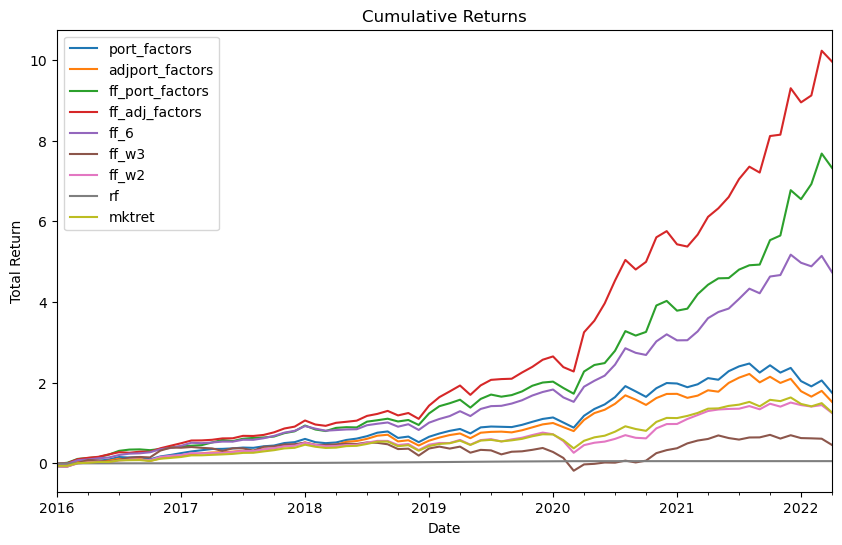

In [370]:
import matplotlib.pyplot as plt

# plot the cumulative returns
test_cumulative_ret_compare.plot(figsize=(10, 6))

# add a title and labels
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Total Return')

# show the plot
plt.show()

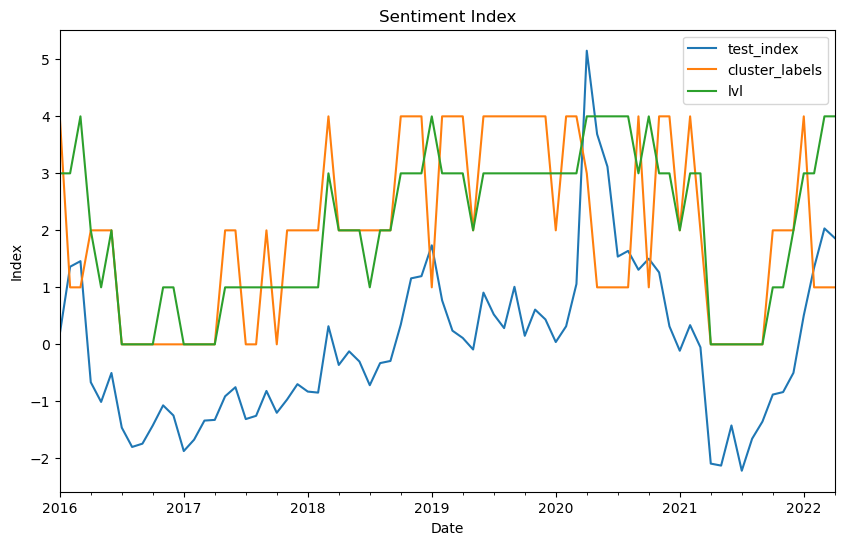

In [371]:
import matplotlib.pyplot as plt

# plot the cumulative returns
test_sent.plot(figsize=(10, 6))

# add a title and labels
plt.title('Sentiment Index')
plt.xlabel('Date')
plt.ylabel('Index')

# show the plot
plt.show()

In [372]:
X = final_factors.loc[test_start_date:test_end_date]
x = X[['mrmrf','WSMB','WHML','test_index']]
x1 = X[['mrmrf']]
y = test_ret_compare['ff_port_factors']
x = sm.add_constant(x)
x1 = sm.add_constant(x1)

est0 = sm.OLS(y, x).fit()
est1 = sm.OLS(y, x1).fit()

In [373]:
print(est0.summary())
print(est1.summary())


                            OLS Regression Results                            
Dep. Variable:        ff_port_factors   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     60.65
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.57e-22
Time:                        00:55:15   Log-Likelihood:                 173.97
No. Observations:                  76   AIC:                            -337.9
Df Residuals:                      71   BIC:                            -326.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.004      1.846      0.0

In [374]:
beta = est1.params[1]


In [375]:
beta

0.9265879452641381